Related urls, will remove once finished:
- https://medium.com/data-science-in-your-pocket/automl-for-time-series-forecasting-using-autots-with-example-735fb559443a
- https://github.com/winedarksea/AutoTS#tips-for-speed-and-large-data

Import libraries

In [1]:
import pandas as pd
from autots import AutoTS
from autots.models.model_list import model_lists
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import sys
from pathlib import Path

parent_dir = Path.cwd().parent.parent

if str(parent_dir) not in sys.path:
    sys.path.insert(0, str(parent_dir))
from shared.metrics import print_evaluation_metrics

from shared.helpers import store_model

Load dataset

In [2]:
file_path = "../data/parsed_dataset.csv"
date_column = "Date_reported"
target_column = "New_deaths"
df = pd.read_csv(file_path, parse_dates=True)
df = df[[date_column, target_column, 'New_cases_30_days_ago']]
df[date_column] = pd.to_datetime(df[date_column], format="%Y-%m-%d")


df = df.groupby(date_column).sum().reset_index()
df.set_index(date_column, inplace=True)
dates = df.index.values

Create model

In [3]:
data_length = len(df)
train_split = 0.9
model = AutoTS(
    forecast_length=(int(data_length*(1-train_split))),
    frequency="D",
    prediction_interval=0.95,
    ensemble=None,
    models_mode="gradient_boosting",
    model_list="univariate",
    max_generations=5,
    num_validations=3,
    no_negatives=True,
    transformer_list="fast",
    n_jobs="auto",
)

Using 6 cpus for n_jobs.


Train test split, fit and prediction

In [9]:
train = df.iloc[:int(data_length*train_split)]
test = df.iloc[int(data_length*train_split):]

In [6]:
model.fit(train)

Data frequency is: D, used frequency is: D
Model Number: 1 with model ARIMA in generation 0 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.04210D+00    |proj g|=  6.13241D-02


 This problem is unconstrained.



At iterate    1    f=  9.03609D+00    |proj g|=  5.31339D-02

At iterate    2    f=  9.03219D+00    |proj g|=  2.61606D-02

At iterate    3    f=  9.03032D+00    |proj g|=  2.00666D-02

At iterate    4    f=  9.02794D+00    |proj g|=  2.15336D-02

At iterate    5    f=  9.02458D+00    |proj g|=  2.32839D-02

At iterate    6    f=  9.02077D+00    |proj g|=  3.53904D-02

At iterate    7    f=  9.01609D+00    |proj g|=  5.21581D-02

At iterate    8    f=  9.00853D+00    |proj g|=  5.49026D-02

At iterate    9    f=  9.00228D+00    |proj g|=  1.34948D-01

At iterate   10    f=  8.99815D+00    |proj g|=  5.77037D-02

At iterate   11    f=  8.99585D+00    |proj g|=  3.89194D-02

At iterate   12    f=  8.99397D+00    |proj g|=  3.04765D-02

At iterate   13    f=  8.99122D+00    |proj g|=  2.51382D-02

At iterate   14    f=  8.98884D+00    |proj g|=  3.55680D-02

At iterate   15    f=  8.98664D+00    |proj g|=  4.17481D-02

At iterate   16    f=  8.98501D+00    |proj g|=  2.17028D-02

At iter

 This problem is unconstrained.



At iterate    1    f=  1.45956D+01    |proj g|=  7.02895D-01

At iterate    2    f=  1.43785D+01    |proj g|=  1.94691D-01

At iterate    3    f=  1.43432D+01    |proj g|=  5.08718D-02

At iterate    4    f=  1.43367D+01    |proj g|=  4.57561D-02

At iterate    5    f=  1.43263D+01    |proj g|=  6.60664D-02

At iterate    6    f=  1.42977D+01    |proj g|=  2.14795D-01

At iterate    7    f=  1.42879D+01    |proj g|=  8.00881D-02

At iterate    8    f=  1.42861D+01    |proj g|=  1.32742D-01

At iterate    9    f=  1.42825D+01    |proj g|=  1.08327D-01

At iterate   10    f=  1.42793D+01    |proj g|=  8.79579D-02

At iterate   11    f=  1.42755D+01    |proj g|=  1.53719D-01

At iterate   12    f=  1.42725D+01    |proj g|=  4.51862D-02

At iterate   13    f=  1.42718D+01    |proj g|=  3.81713D-02

At iterate   14    f=  1.42703D+01    |proj g|=  4.51555D-02

At iterate   15    f=  1.42673D+01    |proj g|=  4.46131D-02

At iterate   16    f=  1.42651D+01    |proj g|=  5.98462D-02

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 7 with model DatepartRegression in generation 0 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 8 with model DatepartRegression in generation 0 of 5


2024-03-31 18:55:12.980044: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-31 18:55:13.049729: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-31 18:55:13.049782: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-31 18:55:13.051362: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-31 18:55:13.061179: I tensorflow/core/platform/cpu_feature_guar

Epoch 1/50
36/36 [==============================] - 8s 6ms/step - loss: 0.3936
Epoch 2/50
36/36 [==============================] - 0s 7ms/step - loss: 0.3902
Epoch 3/50
36/36 [==============================] - 0s 7ms/step - loss: 0.3879
Epoch 4/50
36/36 [==============================] - 0s 6ms/step - loss: 0.3863
Epoch 5/50
36/36 [==============================] - 0s 6ms/step - loss: 0.3858
Epoch 6/50
36/36 [==============================] - 0s 7ms/step - loss: 0.3854
Epoch 7/50
36/36 [==============================] - 0s 7ms/step - loss: 0.3867
Epoch 8/50
36/36 [==============================] - 0s 8ms/step - loss: 0.3834
Epoch 9/50
36/36 [==============================] - 0s 8ms/step - loss: 0.3847
Epoch 10/50
36/36 [==============================] - 0s 7ms/step - loss: 0.3827
Epoch 11/50
36/36 [==============================] - 0s 6ms/step - loss: 0.3840
Epoch 12/50
36/36 [==============================] - 0s 6ms/step - loss: 0.3824
Epoch 13/50
36/36 [==============================

/home/samuell/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


Model Number: 26 with model FBProphet in generation 0 of 5


18:55:49 - cmdstanpy - INFO - Chain [1] start processing
18:55:49 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 27 with model DatepartRegression in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 27 in generation 0: DatepartRegression
Model Number: 28 with model SeasonalNaive in generation 0 of 5
Model Number: 29 with model DatepartRegression in generation 0 of 5
Model Number: 30 with model UnobservedComponents in generation 0 of 5
Model Number: 31 with model UnobservedComponents in generation 0 of 5
Model Number: 32 with model ETS in generation 0 of 5
Model Number: 33 with model ARDL in generation 0 of 5
Model Number: 34 with model UnivariateMotif in generation 0 of 5
Model Number: 35 with model UnivariateMotif in generation 0 of 5
Model Number: 36 with model FBProphet in generation 0 of 5
Model Number: 37 with model SeasonalNaive in generation 0 of 5
Model Number: 38 with model DatepartRegression in generation 0 of 5
Model Number: 39 with model Theta in generation 0 of 5
Model Number: 40 with model UnivariateRegr

 This problem is unconstrained.



At iterate    1    f=  9.47629D+00    |proj g|=  2.29452D-02

At iterate    2    f=  9.47565D+00    |proj g|=  1.96021D-02

At iterate    3    f=  9.47526D+00    |proj g|=  5.19054D-03

At iterate    4    f=  9.47524D+00    |proj g|=  1.38000D-03

At iterate    5    f=  9.47523D+00    |proj g|=  2.16383D-04

At iterate    6    f=  9.47523D+00    |proj g|=  1.30122D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      6      8      1     0     0   1.301D-05   9.475D+00
  F =   9.4752335682106352     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate    2    f=  1.65892D+01    |proj g|=  7.42074D+00

At iterate    3    f=  1.55920D+01    |proj g|=  1.58089D+00

At iterate    4    f=  1.55822D+01    |proj g|=  1.04411D+00

At iterate    5    f=  1.55761D+01    |proj g|=  5.62792D-01

At iterate    6    f=  1.55720D+01    |proj g|=  6.00593D-01

At iterate    7    f=  1.55609D+01    |proj g|=  8.64102D-01

At iterate    8    f=  1.55525D+01    |proj g|=  6.75673D-01

At iterate    9    f=  1.55507D+01    |proj g|=  9.89893D-02

At iterate   10    f=  1.55506D+01    |proj g|=  1.95146D-02

At iterate   11    f=  1.55506D+01    |proj g|=  2.05239D-03

At iterate   12    f=  1.55506D+01    |proj g|=  5.59622D-04

At iterate   13    f=  1.55506D+01    |proj g|=  2.47889D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

/home/samuell/.local/lib/python3.10/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:15: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


Model Number: 52 with model FFT in generation 0 of 5
Template Eval Error: Exception('Transformer QuantileTransformer failed on inverse') in model 52 in generation 0: FFT
Model Number: 53 with model ETS in generation 0 of 5
Model Number: 54 with model ARDL in generation 0 of 5
Model Number: 55 with model ConstantNaive in generation 0 of 5
Model Number: 56 with model GLM in generation 0 of 5
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 56 in generation 0: GLM
Model Number: 57 with model LastValueNaive in generation 0 of 5
Model Number: 58 with model NeuralProphet in generation 0 of 5
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 58 in generation 0: NeuralProphet
Model Number: 59 with model GLS in generation 0 of 5
Model Number: 60 with model UnivariateMotif in generation 0 of 5
Model Number: 61 with model SeasonalNaive in generation 0 of 5
Model Number: 62 with model FBProphet in generation 0 of 5
M

 This problem is unconstrained.



At iterate    9    f=  9.24003D+00    |proj g|=  5.88017D-02

At iterate   10    f=  9.23752D+00    |proj g|=  2.88490D-02

At iterate   11    f=  9.23542D+00    |proj g|=  1.78941D-02

At iterate   12    f=  9.23151D+00    |proj g|=  2.27420D-02

At iterate   13    f=  9.22843D+00    |proj g|=  2.17706D-02

At iterate   14    f=  9.22838D+00    |proj g|=  4.45430D-02

At iterate   15    f=  9.22536D+00    |proj g|=  9.51723D-03

At iterate   16    f=  9.22471D+00    |proj g|=  4.95312D-03

At iterate   17    f=  9.22422D+00    |proj g|=  4.64880D-03

At iterate   18    f=  9.22383D+00    |proj g|=  7.24689D-03

At iterate   19    f=  9.22360D+00    |proj g|=  8.88793D-04

At iterate   20    f=  9.22353D+00    |proj g|=  1.21077D-03

At iterate   21    f=  9.22350D+00    |proj g|=  3.94169D-04

At iterate   22    f=  9.22350D+00    |proj g|=  8.08345D-04

At iterate   23    f=  9.22350D+00    |proj g|=  1.82675D-04

At iterate   24    f=  9.22350D+00    |proj g|=  7.82146D-05

At iter

 This problem is unconstrained.


At iterate    6    f=  1.43964D+01    |proj g|=  1.04561D-01

At iterate    7    f=  1.43947D+01    |proj g|=  9.20275D-02

At iterate    8    f=  1.43854D+01    |proj g|=  3.59008D-02

At iterate    9    f=  1.43839D+01    |proj g|=  4.02674D-03

At iterate   10    f=  1.43838D+01    |proj g|=  9.86067D-04

At iterate   11    f=  1.43838D+01    |proj g|=  2.79466D-03

At iterate   12    f=  1.43838D+01    |proj g|=  3.73035D-03

At iterate   13    f=  1.43838D+01    |proj g|=  1.30407D-03

At iterate   14    f=  1.43838D+01    |proj g|=  2.17137D-04

At iterate   15    f=  1.43838D+01    |proj g|=  1.88249D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf

/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1319: RuntimeWarning: overflow encountered in multiply
  return a * b.transpose((0, 2, 1))
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/samuell/.local/lib/python3.10/site-packages/autots/models/basics.py:2214: RuntimeWarning: invalid value encountered in sqrt
  df_stdev = np.sqrt(resu

Model Number: 72 with model ETS in generation 0 of 5
Model Number: 73 with model LastValueNaive in generation 0 of 5
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 73 in generation 0: LastValueNaive
Model Number: 74 with model ARCH in generation 0 of 5
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 74 in generation 0: ARCH
Model Number: 75 with model ConstantNaive in generation 0 of 5
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 75 in generation 0: ConstantNaive
Model Number: 76 with model ARCH in generation 0 of 5
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 76 in generation 0: ARCH
Model Number: 77 with model PreprocessingRegression in generation 0 of 5
Template Eval Error: ValueError('Shape of passed values is (1137, 4), indices imply (1137, 2)') in model 77 in generation 0: PreprocessingRegression
Model Number: 78 with model Univari

/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=9.38577e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 82 with model FFT in generation 0 of 5
Model Number: 83 with model FBProphet in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 83 in generation 0: FBProphet
Model Number: 84 with model Theta in generation 0 of 5
Template Eval Error: Exception('Transformer RegressionFilter failed on fit') in model 84 in generation 0: Theta
Model Number: 85 with model ARCH in generation 0 of 5
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 85 in generation 0: ARCH
Model Number: 86 with model SeasonalNaive in generation 0 of 5
Model Number: 87 with model AverageValueNaive in generation 0 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 87 in generation 0: AverageValueNaive
Model Number: 88 with model GLS in generation 0 of 5
Model Number: 89 with model ARCH in generation 0 of 5
Template Eval Error: ImportError('`arch` package must be install

/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=1.07154e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=9.38577e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Template Eval Error: ValueError('all the input array dimensions for the concatenation axis must match exactly, but along dimension 2, the array at index 0 has size 2 and the array at index 1 has size 21') in model 94 in generation 0: MLEnsemble
Model Number: 95 with model KalmanStateSpace in generation 0 of 5
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 95 in generation 0: KalmanStateSpace
Model Number: 96 with model ConstantNaive in generation 0 of 5
Template Eval Error: Exception('Transformer RegressionFilter failed on fit') in model 96 in generation 0: ConstantNaive
Model Number: 97 with model UnivariateMotif in generation 0 of 5
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 97 in generation 0: UnivariateMotif
Model Number: 98 with model Theta in generation 0 of 5
Model Number: 99 with model SeasonalNaive in generation 0 of 5
Model Number: 100 with model ARDL in generation 0 of 5
Model Numb

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 102 with model GLS in generation 0 of 5
Model Number: 103 with model UnobservedComponents in generation 0 of 5
Model Number: 104 with model LastValueNaive in generation 0 of 5
Model Number: 105 with model ETS in generation 0 of 5
Model Number: 106 with model UnobservedComponents in generation 0 of 5
Model Number: 107 with model GLS in generation 0 of 5
Model Number: 108 with model MLEnsemble in generation 0 of 5
Template Eval Error: ValueError('all the input array dimensions for the concatenation axis must match exactly, but along dimension 2, the array at index 0 has size 2 and the array at index 1 has size 21') in model 108 in generation 0: MLEnsemble
Model Number: 109 with model SeasonalityMotif in generation 0 of 5
Model Number: 110 with model ARDL in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 110 in generation 0: ARDL
Model Number: 111 with model PreprocessingRegression in generation 0 of 5
T

 This problem is unconstrained.



At iterate   10    f=  9.45124D+00    |proj g|=  1.28830D-01

At iterate   11    f=  9.43752D+00    |proj g|=  6.87094D-02

At iterate   12    f=  9.43052D+00    |proj g|=  3.43806D-02

At iterate   13    f=  9.42870D+00    |proj g|=  1.49975D-02

At iterate   14    f=  9.42826D+00    |proj g|=  1.08279D-02

At iterate   15    f=  9.42777D+00    |proj g|=  1.14763D-02

At iterate   16    f=  9.42709D+00    |proj g|=  1.87828D-02

At iterate   17    f=  9.42541D+00    |proj g|=  2.44065D-02

At iterate   18    f=  9.42279D+00    |proj g|=  3.22337D-02

At iterate   19    f=  9.42038D+00    |proj g|=  1.17694D-02

At iterate   20    f=  9.41921D+00    |proj g|=  5.44450D-03

At iterate   21    f=  9.41880D+00    |proj g|=  3.42408D-02

At iterate   22    f=  9.41833D+00    |proj g|=  1.14371D-02

At iterate   23    f=  9.41799D+00    |proj g|=  8.69887D-03

At iterate   24    f=  9.41754D+00    |proj g|=  1.60708D-02

At iterate   25    f=  9.41718D+00    |proj g|=  5.52209D-03

At iter

 This problem is unconstrained.



At iterate   10    f=  1.42455D+01    |proj g|=  2.59902D-01

At iterate   11    f=  1.42328D+01    |proj g|=  1.63357D-01

At iterate   12    f=  1.42206D+01    |proj g|=  1.02427D-01

At iterate   13    f=  1.42117D+01    |proj g|=  3.17000D-02

At iterate   14    f=  1.42088D+01    |proj g|=  2.63460D-02

At iterate   15    f=  1.42081D+01    |proj g|=  3.89691D-02

At iterate   16    f=  1.42072D+01    |proj g|=  3.77984D-02

At iterate   17    f=  1.42062D+01    |proj g|=  2.74958D-02

At iterate   18    f=  1.42057D+01    |proj g|=  4.82059D-03

At iterate   19    f=  1.42056D+01    |proj g|=  4.83297D-03

At iterate   20    f=  1.42055D+01    |proj g|=  4.87914D-03

At iterate   21    f=  1.42051D+01    |proj g|=  1.23950D-02

At iterate   22    f=  1.42046D+01    |proj g|=  5.12016D-02

At iterate   23    f=  1.42039D+01    |proj g|=  2.84060D-02

At iterate   24    f=  1.42024D+01    |proj g|=  8.52680D-03

At iterate   25    f=  1.42016D+01    |proj g|=  4.37792D-03

At iter


 Nonpositive definiteness in Cholesky factorization in formt;
   refresh the lbfgs memory and restart the iteration.



At iterate   68    f=  1.40323D+01    |proj g|=  1.29722D-02

At iterate   69    f=  1.40318D+01    |proj g|=  1.68150D-02

At iterate   70    f=  1.40311D+01    |proj g|=  1.33714D-02

At iterate   71    f=  1.40287D+01    |proj g|=  2.50057D-02

At iterate   72    f=  1.40214D+01    |proj g|=  5.48674D-02

At iterate   73    f=  1.40183D+01    |proj g|=  7.05733D-02

At iterate   74    f=  1.40088D+01    |proj g|=  9.22356D-02

At iterate   75    f=  1.39881D+01    |proj g|=  1.03387D-01

At iterate   76    f=  1.39731D+01    |proj g|=  1.26485D-01

At iterate   77    f=  1.39650D+01    |proj g|=  1.52563D-01

At iterate   78    f=  1.39605D+01    |proj g|=  8.63360D-02

At iterate   79    f=  1.39575D+01    |proj g|=  8.68476D-03

At iterate   80    f=  1.39574D+01    |proj g|=  6.09263D-03

At iterate   81    f=  1.39574D+01    |proj g|=  7.65848D-04

At iterate   82    f=  1.39574D+01    |proj g|=  4.48599D-04

At iterate   83    f=  1.39574D+01    |proj g|=  3.65969D-05

At iter

 This problem is unconstrained.



At iterate    1    f= -6.75243D-01    |proj g|=  1.08963D+00

At iterate    2    f= -7.20064D-01    |proj g|=  3.45278D-01

At iterate    3    f= -7.57492D-01    |proj g|=  3.34748D+00

At iterate    4    f= -7.83492D-01    |proj g|=  3.17606D-01

At iterate    5    f= -7.87782D-01    |proj g|=  3.47852D-01

At iterate    6    f= -8.28279D-01    |proj g|=  5.12593D-01

At iterate    7    f= -9.22476D-01    |proj g|=  3.88616D-01

At iterate    8    f= -9.79415D-01    |proj g|=  5.87568D-01

At iterate    9    f= -1.06040D+00    |proj g|=  8.88545D-01

At iterate   10    f= -1.10964D+00    |proj g|=  4.90743D-01

At iterate   11    f= -1.12726D+00    |proj g|=  7.87429D-01

At iterate   12    f= -1.13427D+00    |proj g|=  8.28635D-01

At iterate   13    f= -1.13994D+00    |proj g|=  3.42444D-01

At iterate   14    f= -1.14231D+00    |proj g|=  1.97632D-01

At iterate   15    f= -1.14467D+00    |proj g|=  4.27988D-01

At iterate   16    f= -1.14704D+00    |proj g|=  1.56352D-01

At iter

 This problem is unconstrained.



At iterate    1    f= -1.29348D+00    |proj g|=  5.23337D-01

At iterate    2    f= -1.29760D+00    |proj g|=  6.87057D-01

At iterate    3    f= -1.30942D+00    |proj g|=  1.87010D+00

At iterate    4    f= -1.34320D+00    |proj g|=  5.07989D+00

At iterate    5    f= -1.36412D+00    |proj g|=  2.20787D+00

At iterate    6    f= -1.37248D+00    |proj g|=  5.37716D-01

At iterate    7    f= -1.37513D+00    |proj g|=  5.35047D-01

At iterate    8    f= -1.37940D+00    |proj g|=  1.26408D+00

At iterate    9    f= -1.38748D+00    |proj g|=  2.09858D+00

At iterate   10    f= -1.40214D+00    |proj g|=  2.61330D+00

At iterate   11    f= -1.42082D+00    |proj g|=  1.97315D+00

At iterate   12    f= -1.44337D+00    |proj g|=  6.13852D-01

At iterate   13    f= -1.47112D+00    |proj g|=  3.90690D+00

At iterate   14    f= -1.49549D+00    |proj g|=  5.69706D+00

At iterate   15    f= -1.54699D+00    |proj g|=  5.80163D+00

At iterate   16    f= -1.55704D+00    |proj g|=  3.30193D+00

At iter

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 161 with model SeasonalityMotif in generation 1 of 5
Model Number: 162 with model DatepartRegression in generation 1 of 5
Epoch 1/50
36/36 [==============================] - 4s 4ms/step - loss: 0.4611
Epoch 2/50
36/36 [==============================] - 0s 4ms/step - loss: 0.4486
Epoch 3/50
36/36 [==============================] - 0s 4ms/step - loss: 0.4157
Epoch 4/50
36/36 [==============================] - 0s 4ms/step - loss: 0.3930
Epoch 5/50
36/36 [==============================] - 0s 6ms/step - loss: 0.3842
Epoch 6/50
36/36 [==============================] - 0s 3ms/step - loss: 0.3822
Epoch 7/50
36/36 [==============================] - 0s 3ms/step - loss: 0.3791
Epoch 8/50
36/36 [==============================] - 0s 3ms/step - loss: 0.3736
Epoch 9/50
36/36 [==============================] - 0s 3ms/step - loss: 0.3734
Epoch 10/50
36/36 [==============================] - 0s 6ms/step - loss: 0.3716
Epoch 11/50
36/36 [==============================] - 0s 4ms/step - loss: 

/home/samuell/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)
/home/samuell/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)
/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=9.38577e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 170 with model Theta in generation 1 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.68069D+00    |proj g|=  7.52642D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   7.526D-07   9.681D+00
  F =   9.6806886649094519     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variabl

 This problem is unconstrained.
 This problem is unconstrained.


Model Number: 171 with model FFT in generation 1 of 5
Model Number: 172 with model ETS in generation 1 of 5
Model Number: 173 with model GLS in generation 1 of 5
Model Number: 174 with model LastValueNaive in generation 1 of 5
Model Number: 175 with model ETS in generation 1 of 5
Model Number: 176 with model DatepartRegression in generation 1 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 176 in generation 1: DatepartRegression
Model Number: 177 with model AverageValueNaive in generation 1 of 5
Model Number: 178 with model FBProphet in generation 1 of 5
Model Number: 179 with model GLS in generation 1 of 5
Model Number: 180 with model SeasonalNaive in generation 1 of 5
Model Number: 181 with model FFT in generation 1 of 5
Model Number: 182 with model SeasonalNaive in generation 1 of 5
Model Number: 183 with model UnobservedComponents in generation 1 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regress

 This problem is unconstrained.



At iterate    1    f=  5.14823D+00    |proj g|=  2.90229D-01

At iterate    2    f=  5.12644D+00    |proj g|=  2.68500D-01

At iterate    3    f=  5.05290D+00    |proj g|=  1.69925D-01

At iterate    4    f=  5.03023D+00    |proj g|=  1.23284D-01

At iterate    5    f=  5.00371D+00    |proj g|=  6.77587D-02

At iterate    6    f=  4.98840D+00    |proj g|=  1.21778D-01

At iterate    7    f=  4.97425D+00    |proj g|=  6.89485D-02

At iterate    8    f=  4.97058D+00    |proj g|=  6.79325D-02

At iterate    9    f=  4.96520D+00    |proj g|=  1.81434D-02

At iterate   10    f=  4.96265D+00    |proj g|=  1.40147D-01

At iterate   11    f=  4.95952D+00    |proj g|=  2.89177D-02

At iterate   12    f=  4.95705D+00    |proj g|=  1.01336D-01

At iterate   13    f=  4.95616D+00    |proj g|=  2.15280D-01

At iterate   14    f=  4.95510D+00    |proj g|=  9.66007D-02

At iterate   15    f=  4.95439D+00    |proj g|=  6.07194D-02

At iterate   16    f=  4.95382D+00    |proj g|=  3.62283D-02

At iter

 This problem is unconstrained.



At iterate    2    f=  1.11982D+01    |proj g|=  2.85310D-02

At iterate    3    f=  1.11922D+01    |proj g|=  3.81384D-02

At iterate    4    f=  1.11839D+01    |proj g|=  4.16357D-02

At iterate    5    f=  1.11821D+01    |proj g|=  2.63442D-02

At iterate    6    f=  1.11810D+01    |proj g|=  1.95499D-02

At iterate    7    f=  1.11800D+01    |proj g|=  1.14559D-02

At iterate    8    f=  1.11796D+01    |proj g|=  1.25634D-02

At iterate    9    f=  1.11790D+01    |proj g|=  1.05615D-02

At iterate   10    f=  1.11780D+01    |proj g|=  2.19756D-02

At iterate   11    f=  1.11774D+01    |proj g|=  3.74364D-02

At iterate   12    f=  1.11766D+01    |proj g|=  1.11701D-02

At iterate   13    f=  1.11762D+01    |proj g|=  1.10519D-02

At iterate   14    f=  1.11760D+01    |proj g|=  8.17672D-03

At iterate   15    f=  1.11758D+01    |proj g|=  7.43674D-03

At iterate   16    f=  1.11757D+01    |proj g|=  7.68372D-03

At iterate   17    f=  1.11757D+01    |proj g|=  3.65845D-03

At iter

 This problem is unconstrained.



At iterate    1    f=  9.30402D+00    |proj g|=  3.91951D-01

At iterate    2    f=  9.16386D+00    |proj g|=  9.20241D-02

At iterate    3    f=  9.15503D+00    |proj g|=  7.04209D-02

At iterate    4    f=  9.13890D+00    |proj g|=  4.18067D-02

At iterate    5    f=  9.12503D+00    |proj g|=  3.53661D-02

At iterate    6    f=  9.09747D+00    |proj g|=  1.14441D-01

At iterate    7    f=  9.08613D+00    |proj g|=  4.02535D-02

At iterate    8    f=  9.08188D+00    |proj g|=  2.21351D-02

At iterate    9    f=  9.07546D+00    |proj g|=  1.23245D-02

At iterate   10    f=  9.07286D+00    |proj g|=  1.08385D-02

At iterate   11    f=  9.07084D+00    |proj g|=  1.65310D-02

At iterate   12    f=  9.06928D+00    |proj g|=  8.63981D-03

At iterate   13    f=  9.06735D+00    |proj g|=  8.81662D-03

At iterate   14    f=  9.06493D+00    |proj g|=  2.61342D-02

At iterate   15    f=  9.06419D+00    |proj g|=  2.08365D-02

At iterate   16    f=  9.06360D+00    |proj g|=  9.22487D-03

At iter

 This problem is unconstrained.



At iterate    1    f=  1.44284D+01    |proj g|=  6.36040D-01

At iterate    2    f=  1.41995D+01    |proj g|=  1.38728D-01

At iterate    3    f=  1.41824D+01    |proj g|=  9.23720D-02

At iterate    4    f=  1.41724D+01    |proj g|=  4.65029D-02

At iterate    5    f=  1.41679D+01    |proj g|=  3.33945D-02

At iterate    6    f=  1.41559D+01    |proj g|=  3.22902D-02

At iterate    7    f=  1.41523D+01    |proj g|=  7.00652D-02

At iterate    8    f=  1.41476D+01    |proj g|=  4.49980D-02

At iterate    9    f=  1.41448D+01    |proj g|=  5.56115D-02

At iterate   10    f=  1.41374D+01    |proj g|=  6.03294D-02

At iterate   11    f=  1.41277D+01    |proj g|=  7.40337D-02

At iterate   12    f=  1.41217D+01    |proj g|=  3.07400D-02

At iterate   13    f=  1.41200D+01    |proj g|=  1.99417D-02

At iterate   14    f=  1.41183D+01    |proj g|=  1.23443D-02

At iterate   15    f=  1.41172D+01    |proj g|=  3.63553D-02

At iterate   16    f=  1.41163D+01    |proj g|=  1.51190D-02

At iter

 This problem is unconstrained.



At iterate    1    f=  8.85086D+00    |proj g|=  1.58965D-01

At iterate    2    f=  8.83711D+00    |proj g|=  6.33436D-02

At iterate    3    f=  8.83178D+00    |proj g|=  4.22318D-02

At iterate    4    f=  8.82889D+00    |proj g|=  4.51905D-02

At iterate    5    f=  8.82174D+00    |proj g|=  4.63205D-02

At iterate    6    f=  8.81459D+00    |proj g|=  6.93670D-02

At iterate    7    f=  8.80827D+00    |proj g|=  8.25258D-02

At iterate    8    f=  8.79720D+00    |proj g|=  7.71293D-02

At iterate    9    f=  8.79410D+00    |proj g|=  3.20068D-02

At iterate   10    f=  8.79282D+00    |proj g|=  2.02416D-02

At iterate   11    f=  8.79159D+00    |proj g|=  1.71119D-02

At iterate   12    f=  8.78841D+00    |proj g|=  3.27144D-02

At iterate   13    f=  8.78580D+00    |proj g|=  4.01005D-02

At iterate   14    f=  8.78462D+00    |proj g|=  3.30338D-02

At iterate   15    f=  8.78363D+00    |proj g|=  8.08969D-02

At iterate   16    f=  8.78278D+00    |proj g|=  1.15886D-01

At iter

 This problem is unconstrained.



At iterate    1    f=  1.41780D+01    |proj g|=  5.27522D-02

At iterate    2    f=  1.41760D+01    |proj g|=  3.89217D-02

At iterate    3    f=  1.41717D+01    |proj g|=  3.78271D-02

At iterate    4    f=  1.41680D+01    |proj g|=  4.38018D-02

At iterate    5    f=  1.41639D+01    |proj g|=  2.39536D-02

At iterate    6    f=  1.41629D+01    |proj g|=  3.99497D-02

At iterate    7    f=  1.41618D+01    |proj g|=  2.93604D-02

At iterate    8    f=  1.41605D+01    |proj g|=  6.33166D-02

At iterate    9    f=  1.41597D+01    |proj g|=  1.64983D-02

At iterate   10    f=  1.41594D+01    |proj g|=  1.82947D-02

At iterate   11    f=  1.41571D+01    |proj g|=  4.91057D-02

At iterate   12    f=  1.41541D+01    |proj g|=  2.45852D-02

At iterate   13    f=  1.41514D+01    |proj g|=  2.44760D-02

At iterate   14    f=  1.41484D+01    |proj g|=  3.56972D-02

At iterate   15    f=  1.41475D+01    |proj g|=  6.06709D-02

At iterate   16    f=  1.41472D+01    |proj g|=  5.33483D-02

At iter

 This problem is unconstrained.



At iterate   10    f= -1.86847D+00    |proj g|=  1.03987D-02

At iterate   11    f= -1.86847D+00    |proj g|=  4.23184D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     11     15      1     0     0   4.232D-03  -1.868D+00
  F =  -1.8684656302387979     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.20650D+00    |proj g|=  2.48786D-02

At iterate    1    f= -1.20650D+00    |proj g|=  8.12714D-04

At iter

 This problem is unconstrained.
/home/samuell/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)
/home/samuell/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)


Model Number: 200 with model UnivariateRegression in generation 1 of 5
Model Number: 201 with model UnobservedComponents in generation 1 of 5
Model Number: 202 with model SeasonalNaive in generation 1 of 5
Model Number: 203 with model LastValueNaive in generation 1 of 5
Model Number: 204 with model SeasonalityMotif in generation 1 of 5
Model Number: 205 with model SeasonalityMotif in generation 1 of 5
Model Number: 206 with model FFT in generation 1 of 5
Model Number: 207 with model SeasonalityMotif in generation 1 of 5
Model Number: 208 with model GLS in generation 1 of 5
Model Number: 209 with model KalmanStateSpace in generation 1 of 5
Model Number: 210 with model DatepartRegression in generation 1 of 5
Epoch 1/50
36/36 [==============================] - 5s 7ms/step - loss: 8121327.0000
Epoch 2/50
36/36 [==============================] - 0s 6ms/step - loss: 8121328.5000
Epoch 3/50
36/36 [==============================] - 0s 5ms/step - loss: 8121326.0000
Epoch 4/50
36/36 [===========

 This problem is unconstrained.



At iterate    1    f=  6.96924D+00    |proj g|=  8.90174D-01

At iterate    2    f=  6.66781D+00    |proj g|=  1.93078D-01

At iterate    3    f=  6.63412D+00    |proj g|=  8.62397D-02

At iterate    4    f=  6.61923D+00    |proj g|=  6.30243D-02

At iterate    5    f=  6.59697D+00    |proj g|=  8.36084D-02

At iterate    6    f=  6.57887D+00    |proj g|=  4.00165D-02

At iterate    7    f=  6.56908D+00    |proj g|=  8.55693D-02

At iterate    8    f=  6.56502D+00    |proj g|=  5.52547D-02

At iterate    9    f=  6.56342D+00    |proj g|=  2.92147D-02

At iterate   10    f=  6.56255D+00    |proj g|=  1.40270D-02

At iterate   11    f=  6.56147D+00    |proj g|=  9.77246D-03

At iterate   12    f=  6.56071D+00    |proj g|=  1.26742D-02

At iterate   13    f=  6.55938D+00    |proj g|=  1.96202D-02

At iterate   14    f=  6.55758D+00    |proj g|=  3.18115D-02

At iterate   15    f=  6.55512D+00    |proj g|=  2.32908D-02

At iterate   16    f=  6.55120D+00    |proj g|=  4.22692D-02

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  120    f=  6.53382D+00    |proj g|=  1.58816D-03

At iterate  121    f=  6.53382D+00    |proj g|=  8.15183D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   18    121    162      2     0     0   8.152D-04   6.534D+00
  F =   6.5338198951365500     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.21653D+01    |proj g|=  1.06638D+00


 This problem is unconstrained.



At iterate    1    f=  1.21448D+01    |proj g|=  8.93147D-01

At iterate    2    f=  1.17486D+01    |proj g|=  1.59538D-01

At iterate    3    f=  1.17307D+01    |proj g|=  8.01014D-02

At iterate    4    f=  1.17215D+01    |proj g|=  5.80099D-02

At iterate    5    f=  1.17128D+01    |proj g|=  6.49903D-02

At iterate    6    f=  1.17029D+01    |proj g|=  4.48085D-02

At iterate    7    f=  1.16975D+01    |proj g|=  5.98401D-02

At iterate    8    f=  1.16916D+01    |proj g|=  2.71632D-02

At iterate    9    f=  1.16886D+01    |proj g|=  3.23350D-02

At iterate   10    f=  1.16869D+01    |proj g|=  4.73383D-02

At iterate   11    f=  1.16857D+01    |proj g|=  4.11851D-02

At iterate   12    f=  1.16843D+01    |proj g|=  1.15263D-02

At iterate   13    f=  1.16839D+01    |proj g|=  8.95806D-03

At iterate   14    f=  1.16833D+01    |proj g|=  7.78502D-03

At iterate   15    f=  1.16825D+01    |proj g|=  1.38703D-02

At iterate   16    f=  1.16818D+01    |proj g|=  3.12286D-02

At iter

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 222 with model GLM in generation 1 of 5


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 223 with model GLS in generation 1 of 5
Model Number: 224 with model KalmanStateSpace in generation 1 of 5
Model Number: 225 with model FFT in generation 1 of 5
Model Number: 226 with model ETS in generation 1 of 5
Model Number: 227 with model Theta in generation 1 of 5
Model Number: 228 with model GLM in generation 1 of 5
Model Number: 229 with model ARDL in generation 1 of 5
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 229 in generation 1: ARDL
Model Number: 230 with model ARDL in generation 1 of 5
Template Eval Error: ValueError("ARDL series New_deaths failed with error IndexError('tuple index out of range') exog train None and predict None") in model 230 in generation 1: ARDL
Model Number: 231 with model UnivariateMotif in generation 1 of 5
Model Number: 232 with model UnobservedComponents in generation 1 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 232 in generation

 This problem is unconstrained.



At iterate    4    f=  1.85619D+01    |proj g|=  8.69781D-02

At iterate    5    f=  1.85601D+01    |proj g|=  1.06568D-01

At iterate    6    f=  1.85567D+01    |proj g|=  1.28298D-01

At iterate    7    f=  1.85516D+01    |proj g|=  6.40828D-02

At iterate    8    f=  1.85485D+01    |proj g|=  1.20918D-02

At iterate    9    f=  1.85483D+01    |proj g|=  1.16121D-02

At iterate   10    f=  1.85481D+01    |proj g|=  1.27248D-02

At iterate   11    f=  1.85475D+01    |proj g|=  1.67737D-02

At iterate   12    f=  1.85428D+01    |proj g|=  2.89588D-02

At iterate   13    f=  1.85369D+01    |proj g|=  3.80516D-02

At iterate   14    f=  1.85355D+01    |proj g|=  5.31734D-02

At iterate   15    f=  1.85285D+01    |proj g|=  2.95378D-02

At iterate   16    f=  1.85229D+01    |proj g|=  2.53733D-02

At iterate   17    f=  1.85205D+01    |proj g|=  5.21514D-02

At iterate   18    f=  1.85170D+01    |proj g|=  1.45696D-02

At iterate   19    f=  1.85150D+01    |proj g|=  1.01145D-02

At iter

 This problem is unconstrained.



At iterate    5    f=  1.26747D+01    |proj g|=  1.14371D-01

At iterate    6    f=  1.26714D+01    |proj g|=  1.23807D-01

At iterate    7    f=  1.26635D+01    |proj g|=  8.91699D-02

At iterate    8    f=  1.26609D+01    |proj g|=  2.97615D-02

At iterate    9    f=  1.26599D+01    |proj g|=  8.77968D-03

At iterate   10    f=  1.26598D+01    |proj g|=  4.06206D-03

At iterate   11    f=  1.26598D+01    |proj g|=  4.06518D-03

At iterate   12    f=  1.26597D+01    |proj g|=  6.26047D-03

At iterate   13    f=  1.26594D+01    |proj g|=  1.29842D-02

At iterate   14    f=  1.26589D+01    |proj g|=  2.31356D-02

At iterate   15    f=  1.26577D+01    |proj g|=  3.38240D-02

At iterate   16    f=  1.26554D+01    |proj g|=  3.86100D-02

At iterate   17    f=  1.26530D+01    |proj g|=  4.04084D-02

At iterate   18    f=  1.26500D+01    |proj g|=  2.36831D-02

At iterate   19    f=  1.26493D+01    |proj g|=  2.31724D-02

At iterate   20    f=  1.26487D+01    |proj g|=  7.65804D-03

At iter

 This problem is unconstrained.



At iterate    6    f=  6.68513D+00    |proj g|=  4.46028D-02

At iterate    7    f=  6.67606D+00    |proj g|=  5.13081D-02

At iterate    8    f=  6.67074D+00    |proj g|=  4.83412D-02

At iterate    9    f=  6.66707D+00    |proj g|=  2.23107D-02

At iterate   10    f=  6.66513D+00    |proj g|=  1.77454D-02

At iterate   11    f=  6.66317D+00    |proj g|=  1.59236D-02

At iterate   12    f=  6.66283D+00    |proj g|=  3.11806D-02

At iterate   13    f=  6.66208D+00    |proj g|=  9.04310D-03

At iterate   14    f=  6.66192D+00    |proj g|=  5.20545D-03

At iterate   15    f=  6.66141D+00    |proj g|=  8.35488D-03

At iterate   16    f=  6.66108D+00    |proj g|=  9.21302D-03

At iterate   17    f=  6.66098D+00    |proj g|=  6.80382D-03

At iterate   18    f=  6.66088D+00    |proj g|=  3.71738D-03

At iterate   19    f=  6.66082D+00    |proj g|=  2.42846D-03

At iterate   20    f=  6.66070D+00    |proj g|=  3.85479D-03

At iterate   21    f=  6.66058D+00    |proj g|=  7.35695D-03

At iter

 This problem is unconstrained.



At iterate    5    f=  1.26093D+01    |proj g|=  4.35640D-02

At iterate    6    f=  1.26050D+01    |proj g|=  4.25418D-02

At iterate    7    f=  1.26005D+01    |proj g|=  3.16745D-02

At iterate    8    f=  1.25968D+01    |proj g|=  3.71035D-02

At iterate    9    f=  1.25954D+01    |proj g|=  2.60829D-02

At iterate   10    f=  1.25944D+01    |proj g|=  3.60046D-02

At iterate   11    f=  1.25913D+01    |proj g|=  2.87281D-02

At iterate   12    f=  1.25887D+01    |proj g|=  2.63205D-02

At iterate   13    f=  1.25881D+01    |proj g|=  1.32180D-02

At iterate   14    f=  1.25880D+01    |proj g|=  6.39697D-03

At iterate   15    f=  1.25880D+01    |proj g|=  2.61941D-03

At iterate   16    f=  1.25880D+01    |proj g|=  1.70620D-03

At iterate   17    f=  1.25880D+01    |proj g|=  3.86693D-03

At iterate   18    f=  1.25880D+01    |proj g|=  4.80176D-03

At iterate   19    f=  1.25879D+01    |proj g|=  3.62309D-03

At iterate   20    f=  1.25879D+01    |proj g|=  4.54224D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    2    f= -1.21002D+00    |proj g|=  4.08200D-02

At iterate    3    f= -1.21003D+00    |proj g|=  4.08206D-02

At iterate    4    f= -1.21006D+00    |proj g|=  1.29508D-01

At iterate    5    f= -1.21015D+00    |proj g|=  2.48827D-01

At iterate    6    f= -1.21037D+00    |proj g|=  4.31817D-01

At iterate    7    f= -1.21083D+00    |proj g|=  6.29779D-01

At iterate    8    f= -1.21158D+00    |proj g|=  6.93848D-01

At iterate    9    f= -1.21231D+00    |proj g|=  4.34161D-01

At iterate   10    f= -1.21253D+00    |proj g|=  1.22455D-01

At iterate   11    f= -1.21256D+00    |proj g|=  1.55179D-02

At iterate   12    f= -1.21256D+00    |proj g|=  3.89460D-04

At iterate   13    f= -1.21256D+00    |proj g|=  2.89821D-04

At iterate   14    f= -1.21256D+00    |proj g|=  2.83976D-03

At iterate   15    f= -1.21256D+00    |proj g|=  1.51422D-02

At iterate   16    f= -1.21256D+00    |proj g|=  3.27727D-02

At iterate   17    f= -1.21256D+00    |proj g|=  6.33127D-02

At iter

/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/pandas/core/nanops.py:1007: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/probabilistic.py:66: RuntimeWarning: invalid value encountered in divide
  post_mu = (
/hom

Model Number: 266 with model ETS in generation 1 of 5
Model Number: 267 with model AverageValueNaive in generation 1 of 5
Model Number: 268 with model ARDL in generation 1 of 5
Model Number: 269 with model GLS in generation 1 of 5
Model Number: 270 with model GLS in generation 1 of 5
Model Number: 271 with model UnobservedComponents in generation 1 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 271 in generation 1: UnobservedComponents
Model Number: 272 with model LastValueNaive in generation 1 of 5
New Generation: 2 of 5


/home/samuell/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/home/samuell/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


Model Number: 273 with model FBProphet in generation 2 of 5
Model Number: 274 with model UnivariateMotif in generation 2 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 274 in generation 2: UnivariateMotif
Model Number: 275 with model UnivariateMotif in generation 2 of 5
Model Number: 276 with model ARIMA in generation 2 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.83440D+00    |proj g|=  3.83751D-04

At iterate    1    f=  7.83439D+00    |proj g|=  8.96375D-05

At iterate    2    f=  7.83439D+00    |proj g|=  4.80531D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg

 This problem is unconstrained.
 This problem is unconstrained.


Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 277 in generation 2: FBProphet
Model Number: 278 with model ARIMA in generation 2 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.21198D+00    |proj g|=  2.78871D-01

At iterate    1    f=  9.15617D+00    |proj g|=  1.66732D-01

At iterate    2    f=  9.13333D+00    |proj g|=  4.01285D-02

At iterate    3    f=  9.13090D+00    |proj g|=  1.89955D-02

At iterate    4    f=  9.13038D+00    |proj g|=  1.20569D-02

At iterate    5    f=  9.12991D+00    |proj g|=  1.20236D-02

At iterate    6    f=  9.12923D+00    |proj g|=  1.44348D-02


 This problem is unconstrained.



At iterate    7    f=  9.12751D+00    |proj g|=  2.54689D-02

At iterate    8    f=  9.12502D+00    |proj g|=  3.01991D-02

At iterate    9    f=  9.12199D+00    |proj g|=  1.11090D-02

At iterate   10    f=  9.12093D+00    |proj g|=  6.07639D-03

At iterate   11    f=  9.12037D+00    |proj g|=  7.93749D-03

At iterate   12    f=  9.12020D+00    |proj g|=  1.19566D-02

At iterate   13    f=  9.11984D+00    |proj g|=  3.23723D-03

At iterate   14    f=  9.11970D+00    |proj g|=  9.87569D-04

At iterate   15    f=  9.11966D+00    |proj g|=  3.74741D-03

At iterate   16    f=  9.11963D+00    |proj g|=  4.83615D-04

At iterate   17    f=  9.11963D+00    |proj g|=  1.02440D-04

At iterate   18    f=  9.11963D+00    |proj g|=  1.02446D-04

At iterate   19    f=  9.11963D+00    |proj g|=  1.41729D-04

At iterate   20    f=  9.11963D+00    |proj g|=  1.90014D-04

At iterate   21    f=  9.11963D+00    |proj g|=  4.14924D-04

At iterate   22    f=  9.11963D+00    |proj g|=  6.92351D-04

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   46    f=  9.08846D+00    |proj g|=  1.97812D-03

At iterate   47    f=  9.08845D+00    |proj g|=  1.16416D-03

At iterate   48    f=  9.08845D+00    |proj g|=  2.99049D-04

At iterate   49    f=  9.08845D+00    |proj g|=  9.11784D-05

At iterate   50    f=  9.08845D+00    |proj g|=  7.72822D-05

At iterate   51    f=  9.08845D+00    |proj g|=  1.75661D-04

At iterate   52    f=  9.08845D+00    |proj g|=  4.17628D-04

At iterate   53    f=  9.08845D+00    |proj g|=  7.99961D-04

At iterate   54    f=  9.08845D+00    |proj g|=  1.42529D-03

At iterate   55    f=  9.08845D+00    |proj g|=  2.43479D-03

At iterate   56    f=  9.08844D+00    |proj g|=  4.07388D-03

At iterate   57    f=  9.08842D+00    |proj g|=  6.73095D-03

At iterate   58    f=  9.08837D+00    |proj g|=  1.10437D-02

At iterate   59    f=  9.08824D+00    |proj g|=  1.80114D-02

At iterate   60    f=  9.08791D+00    |proj g|=  2.90898D-02

At iterate   61    f=  9.08705D+00    |proj g|=  4.58388D-02

At iter

 This problem is unconstrained.



At iterate   11    f=  1.43927D+01    |proj g|=  3.59553D-03

At iterate   12    f=  1.43926D+01    |proj g|=  8.62476D-04

At iterate   13    f=  1.43926D+01    |proj g|=  6.13977D-04

At iterate   14    f=  1.43926D+01    |proj g|=  4.44090D-04

At iterate   15    f=  1.43926D+01    |proj g|=  1.50292D-04

At iterate   16    f=  1.43926D+01    |proj g|=  5.29765D-05

At iterate   17    f=  1.43926D+01    |proj g|=  4.66063D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     17     20      1     0     0   4.661D-06   1.439D+01
  F =   14.392610940129158     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

/home/samuell/.local/lib/python3.10/site-packages/sklearn/neighbors/_regression.py:500: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 281 in generation 2: DatepartRegression
Model Number: 282 with model UnobservedComponents in generation 2 of 5
Model Number: 283 with model ETS in generation 2 of 5
Model Number: 284 with model GLS in generation 2 of 5
Model Number: 285 with model FBProphet in generation 2 of 5
Model Number: 286 with model AverageValueNaive in generation 2 of 5
Model Number: 287 with model ARIMA in generation 2 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.75851D+00    |proj g|=  1.01381D+00

At iterate    1    f= -2.75857D+00    |proj g|=  8.15223D-02

At iterate    2    f= -2.75857D+00    |proj g|=  5.46297D-02

At iterate    3    f= -2.75857D+00    |proj g|=  7.02197D-02

At iterate    4    f= -2.75858D+00    |proj g|=  

 This problem is unconstrained.



At iterate   14    f= -2.76485D+00    |proj g|=  3.07278D-01

At iterate   15    f= -2.76487D+00    |proj g|=  5.90210D-01

At iterate   16    f= -2.76492D+00    |proj g|=  9.37706D-01

At iterate   17    f= -2.76504D+00    |proj g|=  1.40955D+00

At iterate   18    f= -2.76532D+00    |proj g|=  2.04122D+00

At iterate   19    f= -2.76588D+00    |proj g|=  2.62775D+00

At iterate   20    f= -2.76661D+00    |proj g|=  2.58348D+00

At iterate   21    f= -2.76664D+00    |proj g|=  2.29296D+00

At iterate   22    f= -2.76707D+00    |proj g|=  1.17178D+00

At iterate   23    f= -2.76716D+00    |proj g|=  2.19529D-01

At iterate   24    f= -2.76717D+00    |proj g|=  4.47516D-02

At iterate   25    f= -2.76717D+00    |proj g|=  5.90869D-02

At iterate   26    f= -2.76719D+00    |proj g|=  1.29112D-01

At iterate   27    f= -2.76738D+00    |proj g|=  6.44546D-01

At iterate   28    f= -2.76771D+00    |proj g|=  1.17927D+00

At iterate   29    f= -2.76875D+00    |proj g|=  2.20754D+00

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   42    f= -2.79825D+00    |proj g|=  1.47937D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     42     92      2     0     0   1.479D-03  -2.798D+00
  F =  -2.7982536067674686     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.02198D+00    |proj g|=  7.50868D-01

At iterate    1    f= -3.02200D+00    |proj g|=  1.31549D-01

At iterate    2    f= -3.02200D+00    |proj g|=  1.31653D-01

At iter

 This problem is unconstrained.



At iterate    4    f= -3.02202D+00    |proj g|=  5.91652D-01

At iterate    5    f= -3.02206D+00    |proj g|=  1.16144D+00

At iterate    6    f= -3.02217D+00    |proj g|=  2.04970D+00

At iterate    7    f= -3.02246D+00    |proj g|=  3.45997D+00

At iterate    8    f= -3.02317D+00    |proj g|=  5.47787D+00

At iterate    9    f= -3.02468D+00    |proj g|=  7.65245D+00

At iterate   10    f= -3.02705D+00    |proj g|=  7.97576D+00

At iterate   11    f= -3.02922D+00    |proj g|=  4.71653D+00

At iterate   12    f= -3.03001D+00    |proj g|=  9.96510D-01

At iterate   13    f= -3.03008D+00    |proj g|=  1.88843D-01

At iterate   14    f= -3.03009D+00    |proj g|=  3.96642D-01

At iterate   15    f= -3.03011D+00    |proj g|=  6.46692D-01

At iterate   16    f= -3.03016D+00    |proj g|=  1.04916D+00

At iterate   17    f= -3.03028D+00    |proj g|=  1.71055D+00

At iterate   18    f= -3.03060D+00    |proj g|=  2.79941D+00

At iterate   19    f= -3.03142D+00    |proj g|=  4.54594D+00

At iter

 This problem is unconstrained.



At iterate    2    f= -1.80345D-01    |proj g|=  5.72531D-01

At iterate    3    f= -2.92330D-01    |proj g|=  1.89800D+00

At iterate    4    f= -4.33277D-01    |proj g|=  4.20171D+00

At iterate    5    f= -6.30441D-01    |proj g|=  7.14267D-01

At iterate    6    f= -7.24286D-01    |proj g|=  4.87004D-01

At iterate    7    f= -8.01116D-01    |proj g|=  3.52310D+00

At iterate    8    f= -8.73819D-01    |proj g|=  1.01807D+00

At iterate    9    f= -9.13921D-01    |proj g|=  9.37100D-01

At iterate   10    f= -9.27644D-01    |proj g|=  1.25834D+00

At iterate   11    f= -9.45851D-01    |proj g|=  2.58792D-01

At iterate   12    f= -9.50217D-01    |proj g|=  1.85484D-01

At iterate   13    f= -9.51846D-01    |proj g|=  5.40527D-02

At iterate   14    f= -9.52492D-01    |proj g|=  9.63872D-02

At iterate   15    f= -9.53105D-01    |proj g|=  1.65176D-01

At iterate   16    f= -9.54574D-01    |proj g|=  1.54229D-01

At iterate   17    f= -9.57253D-01    |proj g|=  2.85835D-01

At iter

 This problem is unconstrained.



At iterate    5    f= -1.08613D+00    |proj g|=  3.10528D-01

At iterate    6    f= -1.13323D+00    |proj g|=  1.72966D+00

At iterate    7    f= -1.15652D+00    |proj g|=  5.15255D-01

At iterate    8    f= -1.18974D+00    |proj g|=  1.52927D+00

At iterate    9    f= -1.23197D+00    |proj g|=  1.47089D+00

At iterate   10    f= -1.30050D+00    |proj g|=  9.69356D-01

At iterate   11    f= -1.30530D+00    |proj g|=  2.33162D-01

At iterate   12    f= -1.30978D+00    |proj g|=  1.61020D+00

At iterate   13    f= -1.31386D+00    |proj g|=  1.27663D+00

At iterate   14    f= -1.31832D+00    |proj g|=  8.30797D-01

At iterate   15    f= -1.31945D+00    |proj g|=  5.79075D-01

At iterate   16    f= -1.31963D+00    |proj g|=  3.89067D-01

At iterate   17    f= -1.32005D+00    |proj g|=  1.62218D-01

At iterate   18    f= -1.32016D+00    |proj g|=  5.27530D-02

At iterate   19    f= -1.32043D+00    |proj g|=  1.23026D-01

At iterate   20    f= -1.32076D+00    |proj g|=  1.64444D-01

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=9.38577e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 299 with model Theta in generation 2 of 5
Model Number: 300 with model KalmanStateSpace in generation 2 of 5
Model Number: 301 with model LastValueNaive in generation 2 of 5
Model Number: 302 with model UnivariateMotif in generation 2 of 5
Model Number: 303 with model FFT in generation 2 of 5
Model Number: 304 with model SeasonalityMotif in generation 2 of 5
Model Number: 305 with model ARIMA in generation 2 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.02736D+00    |proj g|=  6.53552D-02


 This problem is unconstrained.



At iterate    1    f=  9.02162D+00    |proj g|=  5.86153D-02

At iterate    2    f=  9.01674D+00    |proj g|=  3.19400D-02

At iterate    3    f=  9.01223D+00    |proj g|=  2.01261D-02

At iterate    4    f=  9.00934D+00    |proj g|=  3.17812D-02

At iterate    5    f=  9.00472D+00    |proj g|=  2.71641D-02

At iterate    6    f=  8.99865D+00    |proj g|=  4.96955D-02

At iterate    7    f=  8.99362D+00    |proj g|=  1.20508D-01

At iterate    8    f=  8.98460D+00    |proj g|=  8.94220D-02

At iterate    9    f=  8.98344D+00    |proj g|=  2.95898D-02

At iterate   10    f=  8.98234D+00    |proj g|=  2.56022D-02

At iterate   11    f=  8.97805D+00    |proj g|=  7.29328D-02

At iterate   12    f=  8.97598D+00    |proj g|=  2.51290D-02

At iterate   13    f=  8.97371D+00    |proj g|=  2.48519D-02

At iterate   14    f=  8.97032D+00    |proj g|=  1.68190D-02

At iterate   15    f=  8.96773D+00    |proj g|=  1.38171D-02

At iterate   16    f=  8.96620D+00    |proj g|=  4.39077D-02

At iter

 This problem is unconstrained.



At iterate    2    f=  1.40682D+01    |proj g|=  6.93340D-02

At iterate    3    f=  1.40609D+01    |proj g|=  4.59974D-02

At iterate    4    f=  1.40555D+01    |proj g|=  3.17710D-02

At iterate    5    f=  1.40475D+01    |proj g|=  4.53072D-02

At iterate    6    f=  1.40346D+01    |proj g|=  5.05658D-02

At iterate    7    f=  1.40291D+01    |proj g|=  4.78854D-02

At iterate    8    f=  1.40265D+01    |proj g|=  1.35938D-01

At iterate    9    f=  1.40223D+01    |proj g|=  7.48847D-02

At iterate   10    f=  1.40197D+01    |proj g|=  1.03506D-01

At iterate   11    f=  1.40193D+01    |proj g|=  5.19108D-02

At iterate   12    f=  1.40188D+01    |proj g|=  3.23460D-02

At iterate   13    f=  1.40180D+01    |proj g|=  4.17541D-02

At iterate   14    f=  1.40168D+01    |proj g|=  6.06943D-02

At iterate   15    f=  1.40145D+01    |proj g|=  4.53128D-02

At iterate   16    f=  1.40138D+01    |proj g|=  7.13933D-02

At iterate   17    f=  1.40106D+01    |proj g|=  2.60047D-02

At iter

 This problem is unconstrained.



At iterate    1    f=  4.12420D+00    |proj g|=  1.88103D-01

At iterate    2    f=  4.07752D+00    |proj g|=  1.19846D-01

At iterate    3    f=  4.02204D+00    |proj g|=  1.20850D-01

At iterate    4    f=  4.01221D+00    |proj g|=  2.49005D-01

At iterate    5    f=  3.99829D+00    |proj g|=  6.17440D-02

At iterate    6    f=  3.99562D+00    |proj g|=  6.35373D-02

At iterate    7    f=  3.99041D+00    |proj g|=  6.23644D-02

At iterate    8    f=  3.98849D+00    |proj g|=  1.05501D-01

At iterate    9    f=  3.98636D+00    |proj g|=  4.01552D-02

At iterate   10    f=  3.98590D+00    |proj g|=  5.72804D-02

At iterate   11    f=  3.98565D+00    |proj g|=  5.30474D-02

At iterate   12    f=  3.98541D+00    |proj g|=  1.73468D-02

At iterate   13    f=  3.98494D+00    |proj g|=  1.71612D-02

At iterate   14    f=  3.98448D+00    |proj g|=  4.71361D-02

At iterate   15    f=  3.98413D+00    |proj g|=  2.57351D-02

At iterate   16    f=  3.98390D+00    |proj g|=  5.73399D-02

At iter

 This problem is unconstrained.



At iterate    1    f=  9.33915D+00    |proj g|=  1.80336D-01

At iterate    2    f=  9.30865D+00    |proj g|=  6.75436D-02

At iterate    3    f=  9.28588D+00    |proj g|=  6.60513D-02

At iterate    4    f=  9.27513D+00    |proj g|=  1.83804D-01

At iterate    5    f=  9.26557D+00    |proj g|=  3.22149D-02

At iterate    6    f=  9.26437D+00    |proj g|=  3.07146D-02

At iterate    7    f=  9.26258D+00    |proj g|=  4.58860D-02

At iterate    8    f=  9.25901D+00    |proj g|=  7.02800D-02

At iterate    9    f=  9.25648D+00    |proj g|=  7.37039D-02

At iterate   10    f=  9.25439D+00    |proj g|=  2.05758D-02

At iterate   11    f=  9.25366D+00    |proj g|=  3.57776D-02

At iterate   12    f=  9.25319D+00    |proj g|=  3.47668D-02

At iterate   13    f=  9.25285D+00    |proj g|=  2.48083D-02

At iterate   14    f=  9.25227D+00    |proj g|=  1.33492D-02

At iterate   15    f=  9.25173D+00    |proj g|=  1.61249D-02

At iterate   16    f=  9.25081D+00    |proj g|=  3.95037D-02

At iter

 This problem is unconstrained.



At iterate    2    f=  1.01221D+01    |proj g|=  2.13639D+00

At iterate    3    f=  1.00215D+01    |proj g|=  1.08522D+00

At iterate    4    f=  9.89595D+00    |proj g|=  1.44654D+00

At iterate    5    f=  9.67488D+00    |proj g|=  1.77152D+00

At iterate    6    f=  9.43509D+00    |proj g|=  1.16998D+00

At iterate    7    f=  9.30043D+00    |proj g|=  5.92321D-01

At iterate    8    f=  9.18724D+00    |proj g|=  2.87380D-01

At iterate    9    f=  9.12163D+00    |proj g|=  7.69651D-01

At iterate   10    f=  9.00328D+00    |proj g|=  8.52146D-01

At iterate   11    f=  8.83309D+00    |proj g|=  6.86880D-01

At iterate   12    f=  8.70569D+00    |proj g|=  9.25614D-01

At iterate   13    f=  8.69597D+00    |proj g|=  6.38344D-01

At iterate   14    f=  8.68225D+00    |proj g|=  9.75682D-02

At iterate   15    f=  8.68120D+00    |proj g|=  1.82928D-01

At iterate   16    f=  8.67960D+00    |proj g|=  5.65414D-02

At iterate   17    f=  8.67896D+00    |proj g|=  3.90056D-02

At iter

 This problem is unconstrained.



At iterate    4    f=  1.52985D+01    |proj g|=  1.89924D+00

At iterate    5    f=  1.48989D+01    |proj g|=  2.90843D+00

At iterate    6    f=  1.45944D+01    |proj g|=  2.10945D+00

At iterate    7    f=  1.44661D+01    |proj g|=  1.90312D+00

At iterate    8    f=  1.43057D+01    |proj g|=  9.40127D-01

At iterate    9    f=  1.42434D+01    |proj g|=  2.94417D-01

At iterate   10    f=  1.42034D+01    |proj g|=  5.06229D-01

At iterate   11    f=  1.41495D+01    |proj g|=  2.72732D-01

At iterate   12    f=  1.41142D+01    |proj g|=  7.43369D-01

At iterate   13    f=  1.40796D+01    |proj g|=  1.85763D-01

At iterate   14    f=  1.40580D+01    |proj g|=  4.11837D-01

At iterate   15    f=  1.40251D+01    |proj g|=  6.04445D-01

At iterate   16    f=  1.39896D+01    |proj g|=  1.11296D+00

At iterate   17    f=  1.39344D+01    |proj g|=  5.60279D-01

At iterate   18    f=  1.39011D+01    |proj g|=  7.84618D-01

At iterate   19    f=  1.37800D+01    |proj g|=  1.41740D+00

At iter

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 334 with model ARIMA in generation 2 of 5
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 334 in generation 2: ARIMA
Model Number: 335 with model GLS in generation 2 of 5
Model Number: 336 with model KalmanStateSpace in generation 2 of 5
Model Number: 337 with model GLS in generation 2 of 5
Model Number: 338 with model Theta in generation 2 of 5
Model Number: 339 with model SeasonalNaive in generation 2 of 5
Model Number: 340 with model ETS in generation 2 of 5
Model Number: 341 with model LastValueNaive in generation 2 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 341 in generation 2: LastValueNaive
Model Number: 342 with model KalmanStateSpace in generation 2 of 5
Model Number: 343 with model KalmanStateSpace in generation 2 of 5
Model Number: 344 with model KalmanStateSpace in generation 2 of 5
Model Number: 345 with model ETS in generation 2 of 5
Model Number: 346 with 

 This problem is unconstrained.



At iterate    1    f=  7.26523D+00    |proj g|=  3.33611D-02

At iterate    2    f=  7.26483D+00    |proj g|=  4.78804D-02

At iterate    3    f=  7.26335D+00    |proj g|=  1.71560D-02

At iterate    4    f=  7.26278D+00    |proj g|=  1.38795D-02

At iterate    5    f=  7.26189D+00    |proj g|=  9.72276D-03

At iterate    6    f=  7.26151D+00    |proj g|=  7.09920D-03

At iterate    7    f=  7.26123D+00    |proj g|=  6.08201D-03

At iterate    8    f=  7.26113D+00    |proj g|=  5.21652D-03

At iterate    9    f=  7.26102D+00    |proj g|=  4.14760D-03

At iterate   10    f=  7.26092D+00    |proj g|=  1.65044D-03

At iterate   11    f=  7.26089D+00    |proj g|=  1.44975D-03

At iterate   12    f=  7.26084D+00    |proj g|=  1.86917D-03

At iterate   13    f=  7.26078D+00    |proj g|=  2.63985D-03

At iterate   14    f=  7.26066D+00    |proj g|=  4.68467D-03

At iterate   15    f=  7.26063D+00    |proj g|=  5.06523D-03

At iterate   16    f=  7.26057D+00    |proj g|=  5.26747D-03

At iter

 This problem is unconstrained.



At iterate    1    f=  1.29341D+01    |proj g|=  8.58098D-01

At iterate    2    f=  1.27464D+01    |proj g|=  2.38951D-01

At iterate    3    f=  1.27080D+01    |proj g|=  1.35481D-01

At iterate    4    f=  1.26566D+01    |proj g|=  8.23789D-02

At iterate    5    f=  1.26080D+01    |proj g|=  7.78958D-02

At iterate    6    f=  1.25926D+01    |proj g|=  1.10771D-01

At iterate    7    f=  1.25785D+01    |proj g|=  5.13655D-02

At iterate    8    f=  1.25690D+01    |proj g|=  5.99828D-02

At iterate    9    f=  1.25597D+01    |proj g|=  1.47868D-01

At iterate   10    f=  1.25578D+01    |proj g|=  9.44446D-02

At iterate   11    f=  1.25562D+01    |proj g|=  1.31016D-01

At iterate   12    f=  1.25523D+01    |proj g|=  3.15446D-02

At iterate   13    f=  1.25511D+01    |proj g|=  3.42327D-02

At iterate   14    f=  1.25489D+01    |proj g|=  3.63770D-02

At iterate   15    f=  1.25462D+01    |proj g|=  5.17299D-02

At iterate   16    f=  1.25431D+01    |proj g|=  4.43212D-02

At iter

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 360 with model ConstantNaive in generation 2 of 5
Model Number: 361 with model GLM in generation 2 of 5


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 362 with model UnobservedComponents in generation 2 of 5
Model Number: 363 with model ConstantNaive in generation 2 of 5
Model Number: 364 with model SeasonalNaive in generation 2 of 5
Model Number: 365 with model ETS in generation 2 of 5
Model Number: 366 with model MetricMotif in generation 2 of 5
Model Number: 367 with model UnobservedComponents in generation 2 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 367 in generation 2: UnobservedComponents
Model Number: 368 with model GLS in generation 2 of 5
Model Number: 369 with model SeasonalNaive in generation 2 of 5
Model Number: 370 with model AverageValueNaive in generation 2 of 5
Model Number: 371 with model UnivariateMotif in generation 2 of 5
Model Number: 372 with model FFT in generation 2 of 5
Model Number: 373 with model DatepartRegression in generation 2 of 5
Model Number: 374 with model AverageValueNaive in generation 2 of 5
Model Number: 375 with model 

 This problem is unconstrained.



At iterate   19    f=  3.86872D+01    |proj g|=  1.39746D-02

At iterate   20    f=  3.86868D+01    |proj g|=  3.08015D-02

At iterate   21    f=  3.86860D+01    |proj g|=  2.78773D-02

At iterate   22    f=  3.86849D+01    |proj g|=  2.89140D-02

At iterate   23    f=  3.86848D+01    |proj g|=  1.00955D-02

At iterate   24    f=  3.86841D+01    |proj g|=  6.47794D-03

At iterate   25    f=  3.86837D+01    |proj g|=  1.34627D-02

At iterate   26    f=  3.86835D+01    |proj g|=  9.90031D-03

At iterate   27    f=  3.86833D+01    |proj g|=  5.72267D-03

At iterate   28    f=  3.86832D+01    |proj g|=  3.45798D-03

At iterate   29    f=  3.86832D+01    |proj g|=  1.97068D-03

At iterate   30    f=  3.86832D+01    |proj g|=  6.93265D-04

At iterate   31    f=  3.86832D+01    |proj g|=  5.13211D-04

At iterate   32    f=  3.86832D+01    |proj g|=  1.57371D-05

At iterate   33    f=  3.86832D+01    |proj g|=  1.49569D-06

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.



At iterate    2    f=  4.24828D+01    |proj g|=  1.96006D-01

At iterate    3    f=  4.24638D+01    |proj g|=  3.11668D-01

At iterate    4    f=  4.24220D+01    |proj g|=  4.27882D-01

At iterate    5    f=  4.23876D+01    |proj g|=  4.59616D-01

At iterate    6    f=  4.22590D+01    |proj g|=  3.24722D-01

At iterate    7    f=  4.22331D+01    |proj g|=  2.66118D-01

At iterate    8    f=  4.22205D+01    |proj g|=  2.12373D-01

At iterate    9    f=  4.21883D+01    |proj g|=  1.06130D-01

At iterate   10    f=  4.21785D+01    |proj g|=  5.51391D-02

At iterate   11    f=  4.21731D+01    |proj g|=  1.95865D-01

At iterate   12    f=  4.21682D+01    |proj g|=  2.84566D-02

At iterate   13    f=  4.21664D+01    |proj g|=  2.32459D-02

At iterate   14    f=  4.21637D+01    |proj g|=  2.58170D-02

At iterate   15    f=  4.21579D+01    |proj g|=  7.56765D-02

At iterate   16    f=  4.21490D+01    |proj g|=  1.34183D-01

At iterate   17    f=  4.21462D+01    |proj g|=  3.22078D-02

At iter

/home/samuell/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/home/samuell/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


Model Number: 388 with model ConstantNaive in generation 3 of 5
Model Number: 389 with model ETS in generation 3 of 5
Model Number: 390 with model ARIMA in generation 3 of 5


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.72349D+00    |proj g|=  5.38285D-02

At iterate    1    f=  8.72276D+00    |proj g|=  6.93998D-02

At iterate    2    f=  8.72063D+00    |proj g|=  9.07342D-03

At iterate    3    f=  8.72045D+00    |proj g|=  7.26547D-03

At iterate    4    f=  8.72034D+00    |proj g|=  2.95809D-03

At iterate    5    f=  8.72031D+00    |proj g|=  1.94260D-03

At iterate    6    f=  8.72031D+00    |proj g|=  1.59384D-03

At iterate    7    f=  8.72030D+00    |proj g|=  1.36893D-03

At iterate    8    f=  8.72029D+00    |proj g|=  1.59911D-03

At iterate    9    f=  8.72028D+00    |proj g|=  2.65751D-03

At iterate   10    f=  8.72027D+00    |proj g|=  4.33113D-03

At iterate   11    f=  8.72023D+00    |proj g|=  3.84376D-03

At iterate   12    f=  8.72015D+00    |proj g|=  4.67825D-03

At iterate   13    f=  8.7

 This problem is unconstrained.



At iterate    1    f=  1.32748D+01    |proj g|=  2.28150D-02

At iterate    2    f=  1.32741D+01    |proj g|=  1.34991D-02

At iterate    3    f=  1.32734D+01    |proj g|=  9.10957D-03

At iterate    4    f=  1.32732D+01    |proj g|=  1.14453D-02

At iterate    5    f=  1.32730D+01    |proj g|=  8.10876D-03

At iterate    6    f=  1.32728D+01    |proj g|=  3.89485D-03

At iterate    7    f=  1.32727D+01    |proj g|=  3.17924D-03

At iterate    8    f=  1.32727D+01    |proj g|=  2.16414D-03

At iterate    9    f=  1.32727D+01    |proj g|=  1.44364D-03

At iterate   10    f=  1.32727D+01    |proj g|=  1.73479D-03

At iterate   11    f=  1.32727D+01    |proj g|=  3.04540D-03

At iterate   12    f=  1.32726D+01    |proj g|=  3.27963D-03

At iterate   13    f=  1.32726D+01    |proj g|=  4.21857D-03

At iterate   14    f=  1.32726D+01    |proj g|=  2.61434D-03

At iterate   15    f=  1.32726D+01    |proj g|=  1.59415D-03

At iterate   16    f=  1.32726D+01    |proj g|=  5.32352D-04

At iter

 This problem is unconstrained.



At iterate    1    f= -9.10010D-01    |proj g|=  2.67634D+00

At iterate    2    f= -9.39305D-01    |proj g|=  4.74047D-01

At iterate    3    f= -9.40443D-01    |proj g|=  4.09526D-01

At iterate    4    f= -9.41182D-01    |proj g|=  2.19532D-01

At iterate    5    f= -9.46096D-01    |proj g|=  4.67807D-01

At iterate    6    f= -9.53533D-01    |proj g|=  9.78791D-01

At iterate    7    f= -9.61554D-01    |proj g|=  9.77161D-01

At iterate    8    f= -9.71007D-01    |proj g|=  4.42057D-01

At iterate    9    f= -9.72181D-01    |proj g|=  4.36066D-02

At iterate   10    f= -9.72398D-01    |proj g|=  5.69211D-02

At iterate   11    f= -9.72728D-01    |proj g|=  1.54455D-01

At iterate   12    f= -9.73568D-01    |proj g|=  3.37255D-01

At iterate   13    f= -9.75339D-01    |proj g|=  5.98072D-01

At iterate   14    f= -9.78379D-01    |proj g|=  8.24853D-01

At iterate   15    f= -9.81708D-01    |proj g|=  5.64648D-01

At iterate   16    f= -9.83482D-01    |proj g|=  4.60223D-01

At iter

 This problem is unconstrained.



At iterate    1    f= -9.14397D-01    |proj g|=  3.27211D+00

At iterate    2    f= -9.64443D-01    |proj g|=  5.22722D-01

At iterate    3    f= -9.64995D-01    |proj g|=  3.34624D-01

At iterate    4    f= -9.65428D-01    |proj g|=  1.09182D-01

At iterate    5    f= -9.66152D-01    |proj g|=  2.01892D-01

At iterate    6    f= -9.67860D-01    |proj g|=  6.31374D-01

At iterate    7    f= -9.71666D-01    |proj g|=  1.18022D+00

At iterate    8    f= -9.77562D-01    |proj g|=  1.44327D+00

At iterate    9    f= -9.82742D-01    |proj g|=  8.93615D-01

At iterate   10    f= -9.85562D-01    |proj g|=  8.49277D-02

At iterate   11    f= -9.86171D-01    |proj g|=  3.09253D-01

At iterate   12    f= -9.86742D-01    |proj g|=  5.08283D-01

At iterate   13    f= -9.88076D-01    |proj g|=  7.42596D-01

At iterate   14    f= -9.89874D-01    |proj g|=  7.61613D-01

At iterate   15    f= -9.93352D-01    |proj g|=  4.59348D-01

At iterate   16    f= -9.96399D-01    |proj g|=  1.47909D-01

At iter

 This problem is unconstrained.



At iterate    1    f=  9.15035D+00    |proj g|=  5.80382D-02

At iterate    2    f=  9.14397D+00    |proj g|=  2.58762D-02

At iterate    3    f=  9.14195D+00    |proj g|=  3.00538D-02

At iterate    4    f=  9.13992D+00    |proj g|=  2.50261D-02

At iterate    5    f=  9.13818D+00    |proj g|=  1.34647D-02

At iterate    6    f=  9.13744D+00    |proj g|=  9.57659D-03

At iterate    7    f=  9.13669D+00    |proj g|=  9.68712D-03

At iterate    8    f=  9.13625D+00    |proj g|=  1.14792D-02

At iterate    9    f=  9.13451D+00    |proj g|=  2.16462D-02

At iterate   10    f=  9.13256D+00    |proj g|=  2.23317D-02

At iterate   11    f=  9.13042D+00    |proj g|=  3.91530D-02

At iterate   12    f=  9.12828D+00    |proj g|=  3.20570D-02

At iterate   13    f=  9.12516D+00    |proj g|=  1.65500D-02

At iterate   14    f=  9.12395D+00    |proj g|=  1.30312D-02

At iterate   15    f=  9.12351D+00    |proj g|=  1.72227D-02

At iterate   16    f=  9.12281D+00    |proj g|=  1.02772D-02

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  294    f=  9.02496D+00    |proj g|=  1.30374D-03

At iterate  295    f=  9.02495D+00    |proj g|=  1.00152D-03

At iterate  296    f=  9.02495D+00    |proj g|=  5.10704D-04

At iterate  297    f=  9.02495D+00    |proj g|=  4.96947D-04

At iterate  298    f=  9.02495D+00    |proj g|=  5.01730D-04

At iterate  299    f=  9.02495D+00    |proj g|=  5.24173D-04

At iterate  300    f=  9.02495D+00    |proj g|=  7.10043D-04

At iterate  301    f=  9.02495D+00    |proj g|=  1.81862D-04

At iterate  302    f=  9.02495D+00    |proj g|=  1.31941D-04

At iterate  303    f=  9.02495D+00    |proj g|=  1.17948D-04

At iterate  304    f=  9.02495D+00    |proj g|=  1.17379D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    1    f=  1.41529D+01    |proj g|=  6.21158D-02

At iterate    2    f=  1.41477D+01    |proj g|=  4.89618D-02

At iterate    3    f=  1.41440D+01    |proj g|=  3.26964D-02

At iterate    4    f=  1.41428D+01    |proj g|=  1.71923D-02

At iterate    5    f=  1.41422D+01    |proj g|=  8.86095D-03

At iterate    6    f=  1.41418D+01    |proj g|=  1.00158D-02

At iterate    7    f=  1.41411D+01    |proj g|=  1.16511D-02

At iterate    8    f=  1.41402D+01    |proj g|=  1.59909D-02

At iterate    9    f=  1.41392D+01    |proj g|=  2.20362D-02

At iterate   10    f=  1.41380D+01    |proj g|=  3.79057D-02

At iterate   11    f=  1.41359D+01    |proj g|=  2.98824D-02

At iterate   12    f=  1.41336D+01    |proj g|=  1.99608D-02

At iterate   13    f=  1.41322D+01    |proj g|=  3.98248D-02

At iterate   14    f=  1.41310D+01    |proj g|=  1.83227D-02

At iterate   15    f=  1.41295D+01    |proj g|=  1.56298D-02

At iterate   16    f=  1.41266D+01    |proj g|=  1.40269D-02

At iter

 This problem is unconstrained.



At iterate    3    f= -3.71065D+00    |proj g|=  3.56438D+01

At iterate    4    f= -3.80795D+00    |proj g|=  4.22938D+01

At iterate    5    f= -3.87824D+00    |proj g|=  5.36733D+01

At iterate    6    f= -3.88736D+00    |proj g|=  3.11381D+01

At iterate    7    f= -3.89461D+00    |proj g|=  8.30284D+00

At iterate    8    f= -3.89504D+00    |proj g|=  1.99570D+00

At iterate    9    f= -3.89509D+00    |proj g|=  8.13411D-01

At iterate   10    f= -3.89512D+00    |proj g|=  8.11425D-01

At iterate   11    f= -3.89533D+00    |proj g|=  3.72251D+00

At iterate   12    f= -3.89573D+00    |proj g|=  7.25134D+00

At iterate   13    f= -3.89688D+00    |proj g|=  1.35085D+01

At iterate   14    f= -3.89963D+00    |proj g|=  2.24864D+01

At iterate   15    f= -3.90651D+00    |proj g|=  3.56844D+01

At iterate   16    f= -3.92271D+00    |proj g|=  5.34923D+01

At iterate   17    f= -3.95926D+00    |proj g|=  7.60405D+01

At iterate   18    f= -4.03832D+00    |proj g|=  1.03518D+02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    4    f= -2.94444D+00    |proj g|=  5.14169D+00

At iterate    5    f= -2.96773D+00    |proj g|=  4.08687D+00

At iterate    6    f= -2.96912D+00    |proj g|=  2.36306D+00

At iterate    7    f= -2.96933D+00    |proj g|=  4.39496D-01

At iterate    8    f= -2.96943D+00    |proj g|=  4.41024D-01

At iterate    9    f= -2.97047D+00    |proj g|=  2.08140D+00

At iterate   10    f= -2.97249D+00    |proj g|=  4.64292D+00

At iterate   11    f= -2.97847D+00    |proj g|=  9.61718D+00

At iterate   12    f= -2.99249D+00    |proj g|=  1.71574D+01

At iterate   13    f= -3.02578D+00    |proj g|=  2.75917D+01

At iterate   14    f= -3.09728D+00    |proj g|=  3.36872D+01

At iterate   15    f= -3.19723D+00    |proj g|=  1.92428D+01

At iterate   16    f= -3.23219D+00    |proj g|=  1.18313D+01

At iterate   17    f= -3.26159D+00    |proj g|=  5.09962D+00

At iterate   18    f= -3.27108D+00    |proj g|=  2.16132D+00

At iterate   19    f= -3.27586D+00    |proj g|=  3.84370D+00

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 414 with model GLM in generation 3 of 5
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 414 in generation 3: GLM
Model Number: 415 with model KalmanStateSpace in generation 3 of 5
Model Number: 416 with model SeasonalNaive in generation 3 of 5
Model Number: 417 with model UnivariateRegression in generation 3 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=9.38577e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 418 with model FBProphet in generation 3 of 5
Model Number: 419 with model KalmanStateSpace in generation 3 of 5
Model Number: 420 with model ETS in generation 3 of 5
Model Number: 421 with model SeasonalNaive in generation 3 of 5
Model Number: 422 with model Theta in generation 3 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2412: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 97274131453211.77, tolerance: 21250680497.190704
  ) = cd_fast.enet_coordinate_descent_multi_task(


Model Number: 423 with model ARDL in generation 3 of 5
Template Eval Error: ValueError("ARDL series New_deaths failed with error IndexError('tuple index out of range') exog train None and predict None") in model 423 in generation 3: ARDL
Model Number: 424 with model ARIMA in generation 3 of 5


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           19     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.02846D+00    |proj g|=  3.75236D+00

At iterate    1    f= -1.13372D+00    |proj g|=  1.17447D+00

At iterate    2    f= -1.16824D+00    |proj g|=  3.58990D+00

At iterate    3    f= -1.24873D+00    |proj g|=  2.12167D+00

At iterate    4    f= -1.26556D+00    |proj g|=  2.94165D-01

At iterate    5    f= -1.26657D+00    |proj g|=  2.89280D-01

At iterate    6    f= -1.27323D+00    |proj g|=  2.61717D-01

At iterate    7    f= -1.31193D+00    |proj g|=  6.67158D-01

At iterate    8    f= -1.32532D+00    |proj g|=  1.36513D-01

At iterate    9    f= -1.32738D+00    |proj g|=  1.27426D-01

At iterate   10    f= -1.32910D+00    |proj g|=  1.36684D-01

At iterate   11    f= -1.33282D+00    |proj g|=  2.26132D-01

At iterate   12    f= -1.33683D+00    |proj g|=  3.57432D-01

At iterate   13    f= -1.3


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  485    f= -1.56825D+00    |proj g|=  7.36687D-03

At iterate  486    f= -1.56825D+00    |proj g|=  6.90233D-03

At iterate  487    f= -1.56825D+00    |proj g|=  3.31552D-03

At iterate  488    f= -1.56825D+00    |proj g|=  6.57400D-03

At iterate  489    f= -1.56825D+00    |proj g|=  1.15574D-02

At iterate  490    f= -1.56825D+00    |proj g|=  1.27381D-02

At iterate  491    f= -1.56826D+00    |proj g|=  1.18861D-02

At iterate  492    f= -1.56826D+00    |proj g|=  3.08270D-03

At iterate  493    f= -1.56826D+00    |proj g|=  2.05088D-03

At iterate  494    f= -1.56826D+00    |proj g|=  2.72512D-03

At iterate  495    f= -1.56826D+00    |proj g|=  2.02190D-03

At iterate  496    f= -1.56826D+00    |proj g|=  1.80223D-02

At iterate  497    f= -1.56826D+00    |proj g|=  8.34037D-03

At iterate  498    f= -1.56826D+00    |proj g|=  5.31250D-03

At iterate  499    f= -1.56826D+00    |proj g|=  6.51169D-03

At iterate  500    f= -1.56826D+00    |proj g|=  5.18733D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           19     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.16151D+00    |proj g|=  3.68817D+00

At iterate    1    f= -1.17782D+00    |proj g|=  7.54050D-01

At iterate    2    f= -1.22923D+00    |proj g|=  8.26960D-01

At iterate    3    f= -1.31544D+00    |proj g|=  5.17718D+00

At iterate    4    f= -1.36134D+00    |proj g|=  2.03345D+00

At iterate    5    f= -1.37346D+00    |proj g|=  7.36386D-01

At iterate    6    f= -1.38132D+00    |proj g|=  8.44070D-01

At iterate    7    f= -1.39739D+00    |proj g|=  1.74424D+00

At iterate    8    f= -1.45746D+00    |proj g|=  3.30987D+00

At iterate    9    f= -1.53723D+00    |proj g|=  3.04861D+00

At iterate   10    f= -1.62385D+00    |proj g|=  1.88998D+00

At iterate   11    f= -1.68524D+00    |proj g|=  6.09432D+00

At iterate   12    f= -1.69902D+00    |proj g|=  1.16997D+00

At iterate   13    f= -1.7

 This problem is unconstrained.



At iterate    1    f=  7.14056D+00    |proj g|=  1.96977D-01

At iterate    2    f=  7.11947D+00    |proj g|=  1.20583D-01

At iterate    3    f=  7.10538D+00    |proj g|=  9.73774D-02

At iterate    4    f=  7.09703D+00    |proj g|=  5.65390D-02

At iterate    5    f=  7.09182D+00    |proj g|=  9.22417D-02

At iterate    6    f=  7.08569D+00    |proj g|=  6.35929D-02

At iterate    7    f=  7.07182D+00    |proj g|=  1.30100D-01

At iterate    8    f=  7.06740D+00    |proj g|=  3.84974D-02

At iterate    9    f=  7.06517D+00    |proj g|=  6.58261D-02

At iterate   10    f=  7.06298D+00    |proj g|=  6.87159D-02

At iterate   11    f=  7.05921D+00    |proj g|=  1.21523D-01

At iterate   12    f=  7.05753D+00    |proj g|=  1.21077D-01

At iterate   13    f=  7.05605D+00    |proj g|=  2.69979D-02

At iterate   14    f=  7.05468D+00    |proj g|=  3.05521D-02

At iterate   15    f=  7.05334D+00    |proj g|=  4.39854D-02

At iterate   16    f=  7.05253D+00    |proj g|=  4.77777D-02

At iter

 This problem is unconstrained.



At iterate    1    f=  1.31077D+01    |proj g|=  3.90646D-01

At iterate    2    f=  1.30311D+01    |proj g|=  3.38193D-01

At iterate    3    f=  1.30008D+01    |proj g|=  1.86245D-01

At iterate    4    f=  1.29940D+01    |proj g|=  1.45411D-01

At iterate    5    f=  1.29809D+01    |proj g|=  1.06467D-01

At iterate    6    f=  1.29704D+01    |proj g|=  2.12415D-01

At iterate    7    f=  1.29603D+01    |proj g|=  9.92065D-02

At iterate    8    f=  1.29547D+01    |proj g|=  1.05145D-01

At iterate    9    f=  1.29486D+01    |proj g|=  1.20291D-01

At iterate   10    f=  1.29412D+01    |proj g|=  7.17279D-02

At iterate   11    f=  1.29349D+01    |proj g|=  1.38327D-01

At iterate   12    f=  1.29302D+01    |proj g|=  1.40303D-01

At iterate   13    f=  1.29256D+01    |proj g|=  8.73794D-02

At iterate   14    f=  1.29245D+01    |proj g|=  7.14375D-02

At iterate   15    f=  1.29222D+01    |proj g|=  5.40183D-02

At iterate   16    f=  1.29178D+01    |proj g|=  1.47401D-01

At iter

 This problem is unconstrained.



At iterate   13    f= -6.72093D-01    |proj g|=  2.07952D-01

At iterate   14    f= -6.74449D-01    |proj g|=  4.28333D-01

At iterate   15    f= -6.79948D-01    |proj g|=  7.33475D-01

At iterate   16    f= -6.90024D-01    |proj g|=  9.78457D-01

At iterate   17    f= -7.04326D-01    |proj g|=  7.53167D-01

At iterate   18    f= -7.10735D-01    |proj g|=  1.38190D+00

At iterate   19    f= -7.22895D-01    |proj g|=  6.14980D-01

At iterate   20    f= -7.27712D-01    |proj g|=  1.51482D-01

At iterate   21    f= -7.28823D-01    |proj g|=  6.54935D-02

At iterate   22    f= -7.29443D-01    |proj g|=  4.81063D-02

At iterate   23    f= -7.29822D-01    |proj g|=  2.15539D-01

At iterate   24    f= -7.32352D-01    |proj g|=  3.82390D-02

At iterate   25    f= -7.33523D-01    |proj g|=  2.69291D-02

At iterate   26    f= -7.36519D-01    |proj g|=  3.94505D-02

At iterate   27    f= -7.37583D-01    |proj g|=  1.76947D-02

At iterate   28    f= -7.37798D-01    |proj g|=  5.53958D-03

At iter

 This problem is unconstrained.



At iterate    5    f= -7.23559D-01    |proj g|=  4.20346D-02

At iterate    6    f= -7.23751D-01    |proj g|=  1.04454D-01

At iterate    7    f= -7.24018D-01    |proj g|=  1.36594D-01

At iterate    8    f= -7.24285D-01    |proj g|=  9.05890D-02

At iterate    9    f= -7.24558D-01    |proj g|=  2.15049D-02

At iterate   10    f= -7.24712D-01    |proj g|=  9.02561D-02

At iterate   11    f= -7.24831D-01    |proj g|=  1.15010D-01

At iterate   12    f= -7.24993D-01    |proj g|=  1.40072D-02

At iterate   13    f= -7.25126D-01    |proj g|=  7.15186D-02

At iterate   14    f= -7.25181D-01    |proj g|=  1.33990D-02

At iterate   15    f= -7.25189D-01    |proj g|=  1.64080D-02

At iterate   16    f= -7.25307D-01    |proj g|=  3.51103D-02

At iterate   17    f= -7.26272D-01    |proj g|=  7.58958D-02

At iterate   18    f= -7.29110D-01    |proj g|=  1.59347D-01

At iterate   19    f= -7.30112D-01    |proj g|=  1.50337D-01

At iterate   20    f= -7.33254D-01    |proj g|=  3.25167D-01

At iter

 This problem is unconstrained.



At iterate   17    f= -2.62367D+00    |proj g|=  4.96983D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     17     36      1     0     0   4.970D-03  -2.624D+00
  F =  -2.6236724597048751     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.15167D+00    |proj g|=  6.51014D+00

At iterate    1    f= -3.15289D+00    |proj g|=  6.95541D-01

At iterate    2    f= -3.15291D+00    |proj g|=  6.45393D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 451 with model FFT in generation 3 of 5
Model Number: 452 with model ARIMA in generation 3 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           19     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.19837D+00    |proj g|=  1.16309D-01
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           19     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.47542D+01    |proj g|=  9.75309D-01

At iterate    1    f=  1.46356D+01    |proj g|=  4.95254D-01


 This problem is unconstrained.
 This problem is unconstrained.



At iterate    1    f=  9.19006D+00    |proj g|=  8.43598D-02

At iterate    2    f=  1.44219D+01    |proj g|=  1.70240D-01

At iterate    2    f=  9.18378D+00    |proj g|=  3.32897D-02
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           19     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.38305D-03    |proj g|=  2.94296D+00

At iterate    3    f=  9.18157D+00    |proj g|=  2.55956D-02
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           19     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.38305D-03    |proj g|=  2.94296D+00


 This problem is unconstrained.
 This problem is unconstrained.



At iterate    4    f=  9.18037D+00    |proj g|=  2.10767D-02

At iterate    3    f=  1.44059D+01    |proj g|=  5.54940D-02

At iterate    5    f=  9.17788D+00    |proj g|=  3.31425D-02

At iterate    1    f= -8.68954D-02    |proj g|=  1.00353D+00

At iterate    6    f=  9.17638D+00    |proj g|=  4.25227D-02

At iterate    1    f= -8.68954D-02    |proj g|=  1.00353D+00

At iterate    4    f=  1.44035D+01    |proj g|=  3.12239D-02

At iterate    7    f=  9.17324D+00    |proj g|=  2.83929D-02

At iterate    5    f=  1.43974D+01    |proj g|=  6.59936D-02

At iterate    8    f=  9.16981D+00    |proj g|=  3.78875D-02

At iterate    2    f= -2.34308D-01    |proj g|=  1.08625D+00

At iterate    2    f= -2.34308D-01    |proj g|=  1.08625D+00

At iterate    9    f=  9.16757D+00    |proj g|=  2.78024D-02

At iterate   10    f=  9.16524D+00    |proj g|=  1.76598D-02

At iterate   11    f=  9.16374D+00    |proj g|=  4.13441D-02

At iterate   12    f=  9.16193D+00    |proj g|=  1.87067D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  136    f=  9.12875D+00    |proj g|=  1.63302D-03

At iterate   37    f= -9.18029D+00    |proj g|=  4.53417D+04

At iterate  137    f=  9.12874D+00    |proj g|=  1.18205D-03

At iterate  138    f=  9.12874D+00    |proj g|=  1.68533D-03

At iterate   38    f= -9.18178D+00    |proj g|=  4.03127D+04

At iterate  139    f=  9.12874D+00    |proj g|=  5.90109D-03

At iterate  140    f=  9.12874D+00    |proj g|=  3.28919D-03

At iterate  141    f=  9.12874D+00    |proj g|=  8.23438D-04

At iterate  142    f=  9.12874D+00    |proj g|=  7.94227D-04

At iterate  143    f=  9.12873D+00    |proj g|=  1.05405D-03

At iterate  144    f=  9.12873D+00    |proj g|=  2.55122D-03

At iterate  145    f=  9.12873D+00    |proj g|=  1.62082D-03

At iterate  146    f=  9.12873D+00    |proj g|=  2.24184D-03

At iterate  147    f=  9.12873D+00    |proj g|=  2.76268D-03

At iterate  148    f=  9.12872D+00    |proj g|=  1.41018D-03

At iterate  149    f=  9.12872D+00    |proj g|=  6.99574D-04

At iter


 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



At iterate  153    f=  9.12872D+00    |proj g|=  1.38953D-03

At iterate  154    f=  9.12872D+00    |proj g|=  3.05616D-03

At iterate  155    f=  9.12872D+00    |proj g|=  4.59672D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  156    f=  9.12871D+00    |proj g|=  5.13688D-03

At iterate  157    f=  9.12871D+00    |proj g|=  4.91259D-03

At iterate  158    f=  9.12871D+00    |proj g|=  8.05902D-03

At iterate  159    f=  9.12871D+00    |proj g|=  2.99934D-03

At iterate  160    f=  9.12870D+00    |proj g|=  5.08720D-03

At iterate  161    f=  9.12870D+00    |proj g|=  8.93136D-03

At iterate  162    f=  9.12870D+00    |proj g|=  1.14231D-02

At iterate  163    f=  9.12870D+00    |proj g|=  8.55950D-03

At iterate  164    f=  9.12869D+00    |proj g|=  1.24568D-02

At iterate  165    f=  9.12869D+00    |proj g|=  9.70290D-03

At iterate  166    f=  9.12868D+00    |proj g|=  4.48088D-03

At iterate  167    f=  9.12867D+00    |proj g|=  1.72923D-03

At iterate  168    f=  9.12866D+00    |proj g|=  1.06905D-02

At iterate  169    f=  9.12865D+00    |proj g|=  1.78287D-02

At iterate  170    f=  9.12864D+00    |proj g|=  5.55697D-03

At iterate  171    f=  9.12863D+00    |proj g|=  7.37470D-03

At iter


 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



At iterate  176    f=  9.12859D+00    |proj g|=  1.34465D-02

At iterate  177    f=  9.12858D+00    |proj g|=  2.46724D-02

At iterate  178    f=  9.12857D+00    |proj g|=  4.75791D-03

At iterate  179    f=  9.12856D+00    |proj g|=  2.01291D-02

At iterate  180    f=  9.12856D+00    |proj g|=  6.43964D-03

At iterate  181    f=  9.12855D+00    |proj g|=  7.22568D-03

At iterate  182    f=  9.12854D+00    |proj g|=  1.89420D-02

At iterate  183    f=  9.12852D+00    |proj g|=  1.59558D-02

At iterate  184    f=  9.12850D+00    |proj g|=  2.59676D-02

At iterate  185    f=  9.12850D+00    |proj g|=  3.05023D-03

At iterate  186    f=  9.12848D+00    |proj g|=  8.60704D-03

At iterate  187    f=  9.12848D+00    |proj g|=  6.28745D-03

At iterate  188    f=  9.12846D+00    |proj g|=  1.04224D-02

At iterate  189    f=  9.12844D+00    |proj g|=  5.81225D-03

At iterate  190    f=  9.12843D+00    |proj g|=  1.47296D-02

At iterate  191    f=  9.12841D+00    |proj g|=  1.40131D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 453 with model KalmanStateSpace in generation 3 of 5
Model Number: 454 with model ETS in generation 3 of 5
Model Number: 455 with model ARDL in generation 3 of 5
Model Number: 456 with model SeasonalNaive in generation 3 of 5
Model Number: 457 with model ETS in generation 3 of 5
Template Eval Error: Exception('Transformer MaxAbsScaler failed on inverse') in model 457 in generation 3: ETS
Model Number: 458 with model UnivariateMotif in generation 3 of 5
Model Number: 459 with model DatepartRegression in generation 3 of 5
Epoch 1/50
36/36 [==============================] - 5s 6ms/step - loss: 166311.9844
Epoch 2/50
36/36 [==============================] - 0s 7ms/step - loss: 166311.2031
Epoch 3/50
36/36 [==============================] - 0s 7ms/step - loss: 166310.0312
Epoch 4/50
36/36 [==============================] - 0s 7ms/step - loss: 166309.3281
Epoch 5/50
36/36 [==============================] - 0s 8ms/step - loss: 166308.8906
Epoch 6/50
36/36 [======================

 This problem is unconstrained.



At iterate   16    f=  8.18889D+00    |proj g|=  1.06342D-03

At iterate   17    f=  8.18888D+00    |proj g|=  4.59536D-04

At iterate   18    f=  8.18888D+00    |proj g|=  2.17513D-05

At iterate   19    f=  8.18888D+00    |proj g|=  2.17517D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     22      1     0     0   2.175D-05   8.189D+00
  F =   8.1888812266233497     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    9    f=  1.33728D+01    |proj g|=  1.59019D-01

At iterate   10    f=  1.33477D+01    |proj g|=  3.60078D-02

At iterate   11    f=  1.33455D+01    |proj g|=  4.33947D-02

At iterate   12    f=  1.33431D+01    |proj g|=  4.27346D-02

At iterate   13    f=  1.33422D+01    |proj g|=  3.58077D-02

At iterate   14    f=  1.33416D+01    |proj g|=  3.07212D-02

At iterate   15    f=  1.33401D+01    |proj g|=  1.40204D-02

At iterate   16    f=  1.33394D+01    |proj g|=  7.47286D-03

At iterate   17    f=  1.33393D+01    |proj g|=  2.91224D-03

At iterate   18    f=  1.33392D+01    |proj g|=  1.61918D-03

At iterate   19    f=  1.33392D+01    |proj g|=  3.52932D-04

At iterate   20    f=  1.33392D+01    |proj g|=  1.05146D-05

At iterate   21    f=  1.33392D+01    |proj g|=  1.57989D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1319: RuntimeWarning: overflow encountered in multiply
  return a * b.transpose((0, 2, 1))
/home/samuell/.local/lib/python3.10/site-packages/autots/models/basics.py:2157: RuntimeWarning: Mean of empty slice
  result_score = np.nansum(np.nanmean(u

Model Number: 491 with model UnobservedComponents in generation 3 of 5
Model Number: 492 with model Theta in generation 3 of 5
Model Number: 493 with model KalmanStateSpace in generation 3 of 5
Model Number: 494 with model FFT in generation 3 of 5
Model Number: 495 with model UnivariateMotif in generation 3 of 5
Model Number: 496 with model SeasonalNaive in generation 3 of 5
Model Number: 497 with model MetricMotif in generation 3 of 5
Model Number: 498 with model FFT in generation 3 of 5
Model Number: 499 with model ETS in generation 3 of 5
Model Number: 500 with model ConstantNaive in generation 3 of 5
Model Number: 501 with model FBProphet in generation 3 of 5
Model Number: 502 with model LastValueNaive in generation 3 of 5
New Generation: 4 of 5


/home/samuell/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/home/samuell/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


Model Number: 503 with model FFT in generation 4 of 5
Model Number: 504 with model ConstantNaive in generation 4 of 5
Model Number: 505 with model SeasonalNaive in generation 4 of 5
Template Eval Error: Exception('Transformer RobustScaler failed on fit') in model 505 in generation 4: SeasonalNaive
Model Number: 506 with model LastValueNaive in generation 4 of 5
Model Number: 507 with model FFT in generation 4 of 5
Model Number: 508 with model Theta in generation 4 of 5
Model Number: 509 with model MetricMotif in generation 4 of 5
Model Number: 510 with model UnobservedComponents in generation 4 of 5
Model Number: 511 with model MetricMotif in generation 4 of 5
Model Number: 512 with model SeasonalityMotif in generation 4 of 5
Model Number: 513 with model LastValueNaive in generation 4 of 5
Model Number: 514 with model MetricMotif in generation 4 of 5
Model Number: 515 with model UnivariateMotif in generation 4 of 5
Model Number: 516 with model FBProphet in generation 4 of 5
Model Numbe

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1402: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:527: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: divide by zero encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_

Model Number: 521 with model GLS in generation 4 of 5
Model Number: 522 with model SeasonalNaive in generation 4 of 5
Model Number: 523 with model FFT in generation 4 of 5
Model Number: 524 with model AverageValueNaive in generation 4 of 5
Model Number: 525 with model SeasonalNaive in generation 4 of 5
Model Number: 526 with model GLS in generation 4 of 5
Model Number: 527 with model SeasonalNaive in generation 4 of 5
Model Number: 528 with model Theta in generation 4 of 5
Model Number: 529 with model ARIMA in generation 4 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.40357D+00    |proj g|=  4.19757D-01

At iterate    1    f=  7.35189D+00    |proj g|=  5.12486D-01


 This problem is unconstrained.



At iterate    2    f=  7.20003D+00    |proj g|=  8.49397D-02

At iterate    3    f=  7.18869D+00    |proj g|=  2.90669D-02

At iterate    4    f=  7.18711D+00    |proj g|=  8.45772D-03

At iterate    5    f=  7.18683D+00    |proj g|=  5.72802D-03

At iterate    6    f=  7.18675D+00    |proj g|=  4.71505D-03

At iterate    7    f=  7.18670D+00    |proj g|=  4.20301D-03

At iterate    8    f=  7.18663D+00    |proj g|=  5.24983D-03

At iterate    9    f=  7.18641D+00    |proj g|=  6.33301D-03

At iterate   10    f=  7.18603D+00    |proj g|=  1.43000D-02

At iterate   11    f=  7.18568D+00    |proj g|=  2.19912D-02

At iterate   12    f=  7.18514D+00    |proj g|=  1.31932D-02

At iterate   13    f=  7.18492D+00    |proj g|=  4.55767D-03

At iterate   14    f=  7.18485D+00    |proj g|=  7.05587D-03

At iterate   15    f=  7.18475D+00    |proj g|=  5.97852D-03

At iterate   16    f=  7.18469D+00    |proj g|=  4.52455D-03

At iterate   17    f=  7.18463D+00    |proj g|=  3.90543D-03

At iter

 This problem is unconstrained.



At iterate    1    f=  1.31899D+01    |proj g|=  5.26160D-01

At iterate    2    f=  1.30377D+01    |proj g|=  9.00439D-02

At iterate    3    f=  1.30250D+01    |proj g|=  2.87577D-02

At iterate    4    f=  1.30236D+01    |proj g|=  8.82351D-03

At iterate    5    f=  1.30233D+01    |proj g|=  5.23717D-03

At iterate    6    f=  1.30232D+01    |proj g|=  4.21601D-03

At iterate    7    f=  1.30231D+01    |proj g|=  6.09717D-03

At iterate    8    f=  1.30229D+01    |proj g|=  8.63966D-03

At iterate    9    f=  1.30224D+01    |proj g|=  1.13110D-02

At iterate   10    f=  1.30218D+01    |proj g|=  2.90758D-02

At iterate   11    f=  1.30212D+01    |proj g|=  1.22876D-02

At iterate   12    f=  1.30209D+01    |proj g|=  1.74165D-02

At iterate   13    f=  1.30207D+01    |proj g|=  4.24082D-03

At iterate   14    f=  1.30206D+01    |proj g|=  5.23512D-03

At iterate   15    f=  1.30205D+01    |proj g|=  1.12935D-02

At iterate   16    f=  1.30204D+01    |proj g|=  5.09753D-03

At iter

 This problem is unconstrained.



At iterate    1    f=  7.82523D+00    |proj g|=  2.96111D-02

At iterate    2    f=  7.82319D+00    |proj g|=  1.25596D-02

At iterate    3    f=  7.82279D+00    |proj g|=  1.29040D-02

At iterate    4    f=  7.82239D+00    |proj g|=  9.67054D-03

At iterate    5    f=  7.82125D+00    |proj g|=  1.37482D-02

At iterate    6    f=  7.81886D+00    |proj g|=  2.34854D-02

At iterate    7    f=  7.81779D+00    |proj g|=  2.61271D-02

At iterate    8    f=  7.81648D+00    |proj g|=  1.00261D-02

At iterate    9    f=  7.81626D+00    |proj g|=  1.23110D-02

At iterate   10    f=  7.81612D+00    |proj g|=  7.07617D-03

At iterate   11    f=  7.81607D+00    |proj g|=  5.77492D-03

At iterate   12    f=  7.81596D+00    |proj g|=  4.96521D-03

At iterate   13    f=  7.81595D+00    |proj g|=  3.23136D-03

At iterate   14    f=  7.81593D+00    |proj g|=  1.65609D-03

At iterate   15    f=  7.81593D+00    |proj g|=  1.26433D-03

At iterate   16    f=  7.81592D+00    |proj g|=  2.16303D-03

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  342    f=  7.73896D+00    |proj g|=  4.77064D-03

At iterate  343    f=  7.73896D+00    |proj g|=  4.60450D-03

At iterate  344    f=  7.73896D+00    |proj g|=  1.82060D-02

At iterate  345    f=  7.73896D+00    |proj g|=  3.69655D-02

At iterate  346    f=  7.73896D+00    |proj g|=  7.13921D-02

At iterate  347    f=  7.73896D+00    |proj g|=  1.22746D-01

At iterate  348    f=  7.73896D+00    |proj g|=  1.95515D-01

At iterate  349    f=  7.73895D+00    |proj g|=  2.72079D-01

At iterate  350    f=  7.73893D+00    |proj g|=  2.92748D-01

At iterate  351    f=  7.73892D+00    |proj g|=  2.13037D-01

At iterate  352    f=  7.73892D+00    |proj g|=  1.21842D-01

At iterate  353    f=  7.73891D+00    |proj g|=  1.34223D-02

At iterate  354    f=  7.73891D+00    |proj g|=  5.75055D-03

At iterate  355    f=  7.73891D+00    |proj g|=  4.76461D-03

At iterate  356    f=  7.73891D+00    |proj g|=  3.20589D-03

At iterate  357    f=  7.73891D+00    |proj g|=  9.41818D-03

At iter

 This problem is unconstrained.



At iterate    1    f=  1.31630D+01    |proj g|=  5.67365D-02

At iterate    2    f=  1.31545D+01    |proj g|=  2.51887D-02

At iterate    3    f=  1.31538D+01    |proj g|=  1.58085D-02

At iterate    4    f=  1.31533D+01    |proj g|=  1.12226D-02

At iterate    5    f=  1.31521D+01    |proj g|=  1.42212D-02

At iterate    6    f=  1.31514D+01    |proj g|=  1.98006D-02

At iterate    7    f=  1.31508D+01    |proj g|=  7.72213D-03

At iterate    8    f=  1.31508D+01    |proj g|=  4.09635D-03

At iterate    9    f=  1.31507D+01    |proj g|=  3.07790D-03

At iterate   10    f=  1.31507D+01    |proj g|=  3.66408D-03

At iterate   11    f=  1.31506D+01    |proj g|=  2.70166D-03

At iterate   12    f=  1.31506D+01    |proj g|=  1.96664D-03

At iterate   13    f=  1.31506D+01    |proj g|=  5.85560D-04

At iterate   14    f=  1.31506D+01    |proj g|=  6.15950D-04

At iterate   15    f=  1.31506D+01    |proj g|=  7.48771D-04

At iterate   16    f=  1.31506D+01    |proj g|=  1.15121D-03

At iter

 This problem is unconstrained.



At iterate    2    f=  8.45142D+00    |proj g|=  5.13130D-01

At iterate    3    f=  8.38681D+00    |proj g|=  1.38112D-01

At iterate    4    f=  8.37445D+00    |proj g|=  1.00521D-01

At iterate    5    f=  8.36046D+00    |proj g|=  9.78997D-02

At iterate    6    f=  8.35029D+00    |proj g|=  6.31976D-02

At iterate    7    f=  8.34109D+00    |proj g|=  3.91059D-02

At iterate    8    f=  8.33675D+00    |proj g|=  6.41596D-02

At iterate    9    f=  8.33172D+00    |proj g|=  2.65742D-02

At iterate   10    f=  8.32699D+00    |proj g|=  2.44363D-02

At iterate   11    f=  8.32528D+00    |proj g|=  1.42276D-02

At iterate   12    f=  8.32458D+00    |proj g|=  1.45416D-02

At iterate   13    f=  8.32433D+00    |proj g|=  3.39597D-02

At iterate   14    f=  8.32405D+00    |proj g|=  1.93116D-02

At iterate   15    f=  8.32360D+00    |proj g|=  1.25730D-02

At iterate   16    f=  8.32315D+00    |proj g|=  1.35801D-02

At iterate   17    f=  8.32247D+00    |proj g|=  2.11490D-02

At iter

 This problem is unconstrained.



At iterate    2    f=  1.37957D+01    |proj g|=  2.05251D-01

At iterate    3    f=  1.37729D+01    |proj g|=  9.21067D-02

At iterate    4    f=  1.37540D+01    |proj g|=  4.18562D-02

At iterate    5    f=  1.37456D+01    |proj g|=  4.31495D-02

At iterate    6    f=  1.37345D+01    |proj g|=  5.51925D-02

At iterate    7    f=  1.37313D+01    |proj g|=  5.39912D-02

At iterate    8    f=  1.37285D+01    |proj g|=  5.99465D-02

At iterate    9    f=  1.37265D+01    |proj g|=  2.00384D-02

At iterate   10    f=  1.37257D+01    |proj g|=  1.50046D-02

At iterate   11    f=  1.37240D+01    |proj g|=  1.51900D-02

At iterate   12    f=  1.37233D+01    |proj g|=  5.60909D-02

At iterate   13    f=  1.37227D+01    |proj g|=  1.46127D-02

At iterate   14    f=  1.37220D+01    |proj g|=  1.31922D-02

At iterate   15    f=  1.37205D+01    |proj g|=  1.76111D-02

At iterate   16    f=  1.37193D+01    |proj g|=  4.79829D-02

At iterate   17    f=  1.37187D+01    |proj g|=  1.19399D-02

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 566 with model ConstantNaive in generation 4 of 5
Model Number: 567 with model DatepartRegression in generation 4 of 5
Model Number: 568 with model GLM in generation 4 of 5
Model Number: 569 with model DatepartRegression in generation 4 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 569 in generation 4: DatepartRegression
Model Number: 570 with model KalmanStateSpace in generation 4 of 5
Model Number: 571 with model KalmanStateSpace in generation 4 of 5
Model Number: 572 with model FFT in generation 4 of 5
Model Number: 573 with model SeasonalityMotif in generation 4 of 5
Model Number: 574 with model SeasonalityMotif in generation 4 of 5
Model Number: 575 with model ARIMA in generation 4 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.20965D+04    |proj g|=  1.50315D+06

 This problem is unconstrained.



At iterate    2    f=  1.46831D+01    |proj g|=  3.12963D+01

At iterate    3    f=  6.60826D+00    |proj g|=  1.27379D+01

At iterate    4    f=  4.04065D+00    |proj g|=  6.81744D+00

At iterate    5    f=  2.51590D+00    |proj g|=  3.33607D+00

At iterate    6    f=  1.80718D+00    |proj g|=  1.75056D+00

At iterate    7    f=  1.44633D+00    |proj g|=  9.13271D-01

At iterate    8    f=  1.26878D+00    |proj g|=  5.08700D-01

At iterate    9    f=  1.17611D+00    |proj g|=  6.74717D-01

At iterate   10    f=  1.11661D+00    |proj g|=  7.70516D-01

At iterate   11    f=  1.04889D+00    |proj g|=  8.55967D-01

At iterate   12    f= -9.87386D-01    |proj g|=  5.25568D+00
  ys=-3.875E+00  -gs= 9.842E-01 BFGS update SKIPPED

At iterate   13    f= -1.12817D+00    |proj g|=  5.70805D+00

At iterate   14    f= -1.23433D+00    |proj g|=  6.68340D+00

At iterate   15    f= -1.32596D+00    |proj g|=  1.05618D+01

At iterate   16    f= -1.47727D+00    |proj g|=  1.27078D+01

At iterate   17  


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.60335D+05    |proj g|=  7.51183D+06

At iterate    1    f=  1.17050D+02    |proj g|=  2.54858D+02


 This problem is unconstrained.



At iterate    2    f=  8.91724D+01    |proj g|=  1.97098D+02

At iterate    3    f=  3.48071D+01    |proj g|=  7.78301D+01

At iterate    4    f=  1.89416D+01    |proj g|=  4.13976D+01

At iterate    5    f=  9.73424D+00    |proj g|=  1.99839D+01

At iterate    6    f=  5.48652D+00    |proj g|=  1.01005D+01

At iterate    7    f=  3.31042D+00    |proj g|=  5.18187D+00

At iterate    8    f=  2.23314D+00    |proj g|=  2.68310D+00

At iterate    9    f=  1.69607D+00    |proj g|=  1.39739D+00

At iterate   10    f=  1.43115D+00    |proj g|=  7.39227D-01

At iterate   11    f=  1.29535D+00    |proj g|=  5.48703D-01

At iterate   12    f=  1.17973D+00    |proj g|=  6.96190D-01

At iterate   13    f= -1.13198D+00    |proj g|=  6.91692D+00
  ys=-7.041E+00  -gs= 1.551E+00 BFGS update SKIPPED

At iterate   14    f= -1.19303D+00    |proj g|=  4.68570D+00

At iterate   15    f= -2.20347D+00    |proj g|=  5.32830D+00

At iterate   16    f= -2.22579D+00    |proj g|=  9.02898D+00

At iterate   17  

/home/samuell/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)
/home/samuell/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)


Model Number: 581 with model GLS in generation 4 of 5
Model Number: 582 with model FBProphet in generation 4 of 5
Model Number: 583 with model UnivariateMotif in generation 4 of 5
Model Number: 584 with model ETS in generation 4 of 5
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 584 in generation 4: ETS
Model Number: 585 with model ARIMA in generation 4 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.69355D+00    |proj g|=  1.44825D+01


 This problem is unconstrained.



At iterate    1    f= -2.71600D+00    |proj g|=  2.31327D+00

At iterate    2    f= -2.71641D+00    |proj g|=  3.74608D-01

At iterate    3    f= -2.71777D+00    |proj g|=  1.87716D+00

At iterate    4    f= -2.72330D+00    |proj g|=  5.17299D+00

At iterate    5    f= -2.74118D+00    |proj g|=  1.06556D+01

At iterate    6    f= -2.76643D+00    |proj g|=  1.32976D+01

At iterate    7    f= -2.78800D+00    |proj g|=  9.43047D+00

At iterate    8    f= -2.79277D+00    |proj g|=  3.38388D+00

At iterate    9    f= -2.79433D+00    |proj g|=  1.99984D-01

At iterate   10    f= -2.79450D+00    |proj g|=  1.24162D-01

At iterate   11    f= -2.79697D+00    |proj g|=  2.94162D-01

At iterate   12    f= -2.80463D+00    |proj g|=  9.04088D-02

At iterate   13    f= -2.80837D+00    |proj g|=  8.29236D-01

At iterate   14    f= -2.81107D+00    |proj g|=  7.49023D-02

At iterate   15    f= -2.81160D+00    |proj g|=  2.35360D-01

At iterate   16    f= -2.81187D+00    |proj g|=  1.55529D+00

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.70821D+00    |proj g|=  2.14465D+01


 This problem is unconstrained.



At iterate    1    f= -2.76803D+00    |proj g|=  9.69962D+00

At iterate    2    f= -2.76952D+00    |proj g|=  6.55494D+00

At iterate    3    f= -2.77234D+00    |proj g|=  1.14625D+00

At iterate    4    f= -2.77244D+00    |proj g|=  3.94118D-01

At iterate    5    f= -2.77484D+00    |proj g|=  3.09117D+00

At iterate    6    f= -2.78487D+00    |proj g|=  9.58023D+00

At iterate    7    f= -2.80520D+00    |proj g|=  1.74987D+01

At iterate    8    f= -2.82802D+00    |proj g|=  1.40803D+01

At iterate    9    f= -2.83925D+00    |proj g|=  3.71105D+00

At iterate   10    f= -2.84016D+00    |proj g|=  7.41437D-01

At iterate   11    f= -2.84020D+00    |proj g|=  8.95381D-02

At iterate   12    f= -2.84021D+00    |proj g|=  9.74853D-02

At iterate   13    f= -2.84024D+00    |proj g|=  4.75938D-01

At iterate   14    f= -2.84030D+00    |proj g|=  9.41254D-01

At iterate   15    f= -2.84047D+00    |proj g|=  1.75420D+00

At iterate   16    f= -2.84089D+00    |proj g|=  2.94242D+00

At iter

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1650: RuntimeWarning: invalid value encountered in log
  endog * np.log(endog / mu) + (mu - endog))


Model Number: 592 with model ARDL in generation 4 of 5
Model Number: 593 with model MetricMotif in generation 4 of 5
Model Number: 594 with model FFT in generation 4 of 5
Model Number: 595 with model KalmanStateSpace in generation 4 of 5
Model Number: 596 with model SeasonalNaive in generation 4 of 5


/home/samuell/.local/lib/python3.10/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: overflow encountered in exp
  result = func(self.values, **kwargs)


Template Eval Error: Exception('Transformer PowerTransformer failed on inverse') in model 596 in generation 4: SeasonalNaive
Model Number: 597 with model UnobservedComponents in generation 4 of 5
Model Number: 598 with model LastValueNaive in generation 4 of 5
Model Number: 599 with model DatepartRegression in generation 4 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 599 in generation 4: DatepartRegression
Model Number: 600 with model SeasonalNaive in generation 4 of 5
Model Number: 601 with model DatepartRegression in generation 4 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 601 in generation 4: DatepartRegression
Model Number: 602 with model SeasonalNaive in generation 4 of 5
Model Number: 603 with model SeasonalityMotif in generation 4 of 5
Model Number: 604 with model FFT in generation 4 of 5
Model Number: 605 with model UnobservedComponents in generation 4 of 5
Model

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   11    f=  4.15571D+00    |proj g|=  1.36923D-04

At iterate   12    f=  4.15571D+00    |proj g|=  1.69914D-04

At iterate   13    f=  4.15571D+00    |proj g|=  1.59589D-05

At iterate   14    f=  4.15571D+00    |proj g|=  3.57030D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     14     18      1     0     0   3.570D-06   4.156D+00
  F =   4.1557141380367533     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    4    f= -4.55701D-01    |proj g|=  1.95599D+00

At iterate    5    f= -4.76862D-01    |proj g|=  2.55468D+00

At iterate    6    f= -6.17840D-01    |proj g|=  5.40777D+00

At iterate    7    f= -7.12873D-01    |proj g|=  1.18171D+00

At iterate    8    f= -7.31798D-01    |proj g|=  8.70774D-01

At iterate    9    f= -7.41452D-01    |proj g|=  9.25873D-02

At iterate   10    f= -7.46639D-01    |proj g|=  3.40853D-01

At iterate   11    f= -7.49688D-01    |proj g|=  3.70635D-01

At iterate   12    f= -7.55858D-01    |proj g|=  1.48699D-01

At iterate   13    f= -7.62540D-01    |proj g|=  6.03289D-01

At iterate   14    f= -7.65099D-01    |proj g|=  2.95777D-01

At iterate   15    f= -7.67219D-01    |proj g|=  9.67029D-02

At iterate   16    f= -7.68253D-01    |proj g|=  5.91321D-02

At iterate   17    f= -7.73095D-01    |proj g|=  9.23704D-02

At iterate   18    f= -7.77673D-01    |proj g|=  7.92970D-01

At iterate   19    f= -7.85409D-01    |proj g|=  9.43236D-01

At iter

 This problem is unconstrained.



At iterate    2    f=  3.53726D-03    |proj g|=  1.23552D+00

At iterate    3    f= -5.98252D-03    |proj g|=  2.11219D+00

At iterate    4    f= -2.35114D-01    |proj g|=  2.61063D+00

At iterate    5    f= -9.23104D-01    |proj g|=  4.56411D+00

At iterate    6    f= -1.07622D+00    |proj g|=  1.47502D+00

At iterate    7    f= -1.08329D+00    |proj g|=  4.87566D-01

At iterate    8    f= -1.08563D+00    |proj g|=  4.62608D-01

At iterate    9    f= -1.09931D+00    |proj g|=  1.38057D+00

At iterate   10    f= -1.10300D+00    |proj g|=  5.38218D-01

At iterate   11    f= -1.10385D+00    |proj g|=  1.16117D-01

At iterate   12    f= -1.10407D+00    |proj g|=  1.14131D-01

At iterate   13    f= -1.10461D+00    |proj g|=  3.26871D-01

At iterate   14    f= -1.10541D+00    |proj g|=  4.76921D-01

At iterate   15    f= -1.10667D+00    |proj g|=  4.71538D-01

At iterate   16    f= -1.11899D+00    |proj g|=  8.89224D-01

At iterate   17    f= -1.13589D+00    |proj g|=  1.18890D+00

At iter

/home/samuell/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/home/samuell/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


Model Number: 618 with model ConstantNaive in generation 5 of 5
Model Number: 619 with model UnobservedComponents in generation 5 of 5
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 619 in generation 5: UnobservedComponents
Model Number: 620 with model UnobservedComponents in generation 5 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2412: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 333466180552860.44, tolerance: 98707805163.26009
  ) = cd_fast.enet_coordinate_descent_multi_task(


Model Number: 621 with model KalmanStateSpace in generation 5 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1319: RuntimeWarning: overflow encountered in multiply
  return a * b.transpose((0, 2, 1))


Model Number: 622 with model ARIMA in generation 5 of 5


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.41588D+00    |proj g|=  5.42335D-04

At iterate    1    f=  9.41588D+00    |proj g|=  3.27359D-04

At iterate    2    f=  9.41588D+00    |proj g|=  3.86935D-04

At iterate    3    f=  9.41588D+00    |proj g|=  1.04670D-04

At iterate    4    f=  9.41588D+00    |proj g|=  4.08384D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      4      6      1     0     0   4.084D-05   9.416D+00
  F =   9.4158831619397763     

CONVERG

 This problem is unconstrained.



At iterate    1    f= -2.69796D+00    |proj g|=  1.23641D+01

At iterate    2    f= -2.71265D+00    |proj g|=  1.72888D+00

At iterate    3    f= -2.71289D+00    |proj g|=  6.87297D-01

At iterate    4    f= -2.71295D+00    |proj g|=  3.77129D-01

At iterate    5    f= -2.71310D+00    |proj g|=  5.30510D-01

At iterate    6    f= -2.71353D+00    |proj g|=  1.79111D+00

At iterate    7    f= -2.71460D+00    |proj g|=  3.62771D+00

At iterate    8    f= -2.71731D+00    |proj g|=  6.33706D+00

At iterate    9    f= -2.72358D+00    |proj g|=  9.85344D+00

At iterate   10    f= -2.73668D+00    |proj g|=  1.35683D+01

At iterate   11    f= -2.75878D+00    |proj g|=  1.55513D+01

At iterate   12    f= -2.78135D+00    |proj g|=  1.18036D+01

At iterate   13    f= -2.78911D+00    |proj g|=  4.47323D+00

At iterate   14    f= -2.79216D+00    |proj g|=  8.93597D-02

At iterate   15    f= -2.79249D+00    |proj g|=  7.79451D-02

At iterate   16    f= -2.79619D+00    |proj g|=  3.92500D-01

At iter

 This problem is unconstrained.



At iterate    1    f= -2.77068D+00    |proj g|=  8.98672D+00

At iterate    2    f= -2.77186D+00    |proj g|=  6.28291D+00

At iterate    3    f= -2.77443D+00    |proj g|=  1.02754D+00

At iterate    4    f= -2.77452D+00    |proj g|=  3.95950D-01

At iterate    5    f= -2.77468D+00    |proj g|=  5.66737D-01

At iterate    6    f= -2.77695D+00    |proj g|=  4.32603D+00

At iterate    7    f= -2.78100D+00    |proj g|=  8.39135D+00

At iterate    8    f= -2.79243D+00    |proj g|=  1.56037D+01

At iterate    9    f= -2.81144D+00    |proj g|=  1.95491D+01

At iterate   10    f= -2.83385D+00    |proj g|=  1.24264D+01

At iterate   11    f= -2.84112D+00    |proj g|=  3.57339D+00

At iterate   12    f= -2.84182D+00    |proj g|=  6.34398D-01

At iterate   13    f= -2.84185D+00    |proj g|=  7.90400D-02

At iterate   14    f= -2.84186D+00    |proj g|=  8.07603D-02

At iterate   15    f= -2.84188D+00    |proj g|=  4.48662D-01

At iterate   16    f= -2.84193D+00    |proj g|=  8.95118D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 633 with model KalmanStateSpace in generation 5 of 5
Model Number: 634 with model ARIMA in generation 5 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.61101D-01    |proj g|=  2.76635D-02

At iterate    1    f=  5.60378D-01    |proj g|=  3.14688D-02

At iterate    2    f=  5.59483D-01    |proj g|=  2.43640D-02

At iterate    3    f=  5.57604D-01    |proj g|=  9.92488D-02

At iterate    4    f=  5.56918D-01    |proj g|=  4.04919D-02

At iterate    5    f=  5.56177D-01    |proj g|=  3.47710D-02

At iterate    6    f=  5.35467D-01    |proj g|=  1.04862D-01

At iterate    7    f=  5.32125D-01    |proj g|=  1.49172D-01

At iterate    8    f=  5.15398D-01    |proj g|=  1.06689D-01

At iterate    9    f=  4.94464D-01    |proj g|=  7.12742D-02

At iterate   10    f=  4.82309D-01    |proj g|=  4.77599D-02

At iterate   11    f=  4.76

 This problem is unconstrained.



At iterate   12    f=  4.71512D-01    |proj g|=  3.71053D-02

At iterate   13    f=  4.63577D-01    |proj g|=  4.26611D-02

At iterate   14    f=  4.60449D-01    |proj g|=  5.49478D-02

At iterate   15    f=  4.60145D-01    |proj g|=  3.57916D-02

At iterate   16    f=  4.59181D-01    |proj g|=  2.03176D-02

At iterate   17    f=  4.57972D-01    |proj g|=  1.44851D-02

At iterate   18    f=  4.57170D-01    |proj g|=  9.74591D-03

At iterate   19    f=  4.56665D-01    |proj g|=  3.25968D-03

At iterate   20    f=  4.56464D-01    |proj g|=  3.51875D-03

At iterate   21    f=  4.56413D-01    |proj g|=  5.09571D-03

At iterate   22    f=  4.56362D-01    |proj g|=  1.52201D-03

At iterate   23    f=  4.56345D-01    |proj g|=  1.74852D-04

At iterate   24    f=  4.56343D-01    |proj g|=  2.35266D-04

At iterate   25    f=  4.56343D-01    |proj g|=  1.81363D-04

At iterate   26    f=  4.56343D-01    |proj g|=  1.22878D-03

At iterate   27    f=  4.56343D-01    |proj g|=  6.55510D-05

At iter

 This problem is unconstrained.



At iterate    8    f=  1.77356D+00    |proj g|=  3.72809D-02

At iterate    9    f=  1.77223D+00    |proj g|=  2.21461D-02

At iterate   10    f=  1.77037D+00    |proj g|=  1.63048D-02

At iterate   11    f=  1.76970D+00    |proj g|=  9.02110D-03

At iterate   12    f=  1.76913D+00    |proj g|=  5.68365D-03

At iterate   13    f=  1.76909D+00    |proj g|=  1.28587D-02

At iterate   14    f=  1.76896D+00    |proj g|=  1.86924D-03

At iterate   15    f=  1.76895D+00    |proj g|=  3.85962D-04

At iterate   16    f=  1.76895D+00    |proj g|=  4.29261D-04

At iterate   17    f=  1.76895D+00    |proj g|=  1.89431D-04

At iterate   18    f=  1.76895D+00    |proj g|=  2.39338D-05

At iterate   19    f=  1.76895D+00    |proj g|=  4.54177D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 647 with model LastValueNaive in generation 5 of 5
Model Number: 648 with model SeasonalNaive in generation 5 of 5
Model Number: 649 with model UnivariateMotif in generation 5 of 5
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 649 in generation 5: UnivariateMotif
Model Number: 650 with model UnobservedComponents in generation 5 of 5
Template Eval Error: LinAlgError('Singular matrix') in model 650 in generation 5: UnobservedComponents
Model Number: 651 with model UnivariateRegression in generation 5 of 5
Model Number: 652 with model SeasonalNaive in generation 5 of 5
Model Number: 653 with model MetricMotif in generation 5 of 5
Model Number: 654 with model KalmanStateSpace in generation 5 of 5
Model Number: 655 with model ARDL in generation 5 of 5
Model Number: 656 with model UnivariateRegression in generation 5 of 5
Model Number: 657 with model ETS in generation 5 of 5
Model Number: 658 with model GLM in generation 5 of 5

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 665 with model UnobservedComponents in generation 5 of 5
Model Number: 666 with model UnobservedComponents in generation 5 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 666 in generation 5: UnobservedComponents
Model Number: 667 with model KalmanStateSpace in generation 5 of 5
Model Number: 668 with model FFT in generation 5 of 5
Model Number: 669 with model ETS in generation 5 of 5
Model Number: 670 with model FFT in generation 5 of 5
Model Number: 671 with model ETS in generation 5 of 5
Template Eval Error: Exception('Transformer ReplaceConstant failed on fit') in model 671 in generation 5: ETS
Model Number: 672 with model ARDL in generation 5 of 5
Model Number: 673 with model UnobservedComponents in generation 5 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 673 in generation 5: UnobservedComponents
Model Number: 674 with model ETS in generation 5 of 5
M

/home/samuell/.local/lib/python3.10/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: overflow encountered in exp
  result = func(self.values, **kwargs)


Model Number: 676 with model GLS in generation 5 of 5
Model Number: 677 with model FBProphet in generation 5 of 5
Model Number: 678 with model FFT in generation 5 of 5
Model Number: 679 with model ConstantNaive in generation 5 of 5
Model Number: 680 with model UnivariateMotif in generation 5 of 5
Model Number: 681 with model DatepartRegression in generation 5 of 5
Model Number: 682 with model ConstantNaive in generation 5 of 5
Model Number: 683 with model ARIMA in generation 5 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           16     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.69266D+00    |proj g|=  1.43076D+01


 This problem is unconstrained.



At iterate    1    f= -2.71485D+00    |proj g|=  3.75863D-01

At iterate    2    f= -2.71540D+00    |proj g|=  1.75355D+00

At iterate    3    f= -2.73811D+00    |proj g|=  2.46086D+00

At iterate    4    f= -2.78658D+00    |proj g|=  1.35727D+01

At iterate    5    f= -2.79340D+00    |proj g|=  2.63530D+00

At iterate    6    f= -2.79412D+00    |proj g|=  5.31312D-01

At iterate    7    f= -2.79415D+00    |proj g|=  7.84545D-02

At iterate    8    f= -2.79418D+00    |proj g|=  2.81391D-01

At iterate    9    f= -2.79433D+00    |proj g|=  1.00917D+00

At iterate   10    f= -2.79474D+00    |proj g|=  2.26927D+00

At iterate   11    f= -2.79571D+00    |proj g|=  4.12674D+00

At iterate   12    f= -2.79793D+00    |proj g|=  6.55330D+00

At iterate   13    f= -2.80155D+00    |proj g|=  7.88503D+00

At iterate   14    f= -2.80455D+00    |proj g|=  4.85905D+00

At iterate   15    f= -2.80589D+00    |proj g|=  1.04545D+00

At iterate   16    f= -2.80611D+00    |proj g|=  1.24086D-01

At iter

 This problem is unconstrained.



At iterate    1    f= -2.77094D+00    |proj g|=  9.03192D+00

At iterate    2    f= -2.77215D+00    |proj g|=  6.29750D+00

At iterate    3    f= -2.77473D+00    |proj g|=  1.03405D+00

At iterate    4    f= -2.77481D+00    |proj g|=  3.98564D-01

At iterate    5    f= -2.77538D+00    |proj g|=  1.84523D+00

At iterate    6    f= -2.77740D+00    |proj g|=  4.28177D+00

At iterate    7    f= -2.78544D+00    |proj g|=  1.12563D+01

At iterate    8    f= -2.79872D+00    |proj g|=  1.70942D+01

At iterate    9    f= -2.82313D+00    |proj g|=  1.76258D+01

At iterate   10    f= -2.84044D+00    |proj g|=  7.06198D+00

At iterate   11    f= -2.84383D+00    |proj g|=  1.17030D+00

At iterate   12    f= -2.84413D+00    |proj g|=  5.71444D-01

At iterate   13    f= -2.84420D+00    |proj g|=  1.03572D+00

At iterate   14    f= -2.84442D+00    |proj g|=  1.96064D+00

At iterate   15    f= -2.84490D+00    |proj g|=  3.20914D+00

At iterate   16    f= -2.84611D+00    |proj g|=  5.04442D+00

At iter

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 686 with model SeasonalNaive in generation 5 of 5
Model Number: 687 with model ARIMA in generation 5 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.50116D+00    |proj g|=  9.69957D-01


 This problem is unconstrained.



At iterate    1    f=  9.29295D+00    |proj g|=  3.85868D-01

At iterate    2    f=  9.15632D+00    |proj g|=  9.17390D-02

At iterate    3    f=  9.14825D+00    |proj g|=  6.46282D-02

At iterate    4    f=  9.13309D+00    |proj g|=  5.03621D-02

At iterate    5    f=  9.11766D+00    |proj g|=  3.86936D-02

At iterate    6    f=  9.10826D+00    |proj g|=  2.44003D-01

At iterate    7    f=  9.08132D+00    |proj g|=  4.07941D-02

At iterate    8    f=  9.07893D+00    |proj g|=  4.65898D-02

At iterate    9    f=  9.07305D+00    |proj g|=  1.77733D-02

At iterate   10    f=  9.07004D+00    |proj g|=  1.31050D-02

At iterate   11    f=  9.06764D+00    |proj g|=  1.86862D-02

At iterate   12    f=  9.06583D+00    |proj g|=  4.26237D-02

At iterate   13    f=  9.06425D+00    |proj g|=  1.34120D-02

At iterate   14    f=  9.06290D+00    |proj g|=  2.02350D-02

At iterate   15    f=  9.06142D+00    |proj g|=  1.68705D-02

At iterate   16    f=  9.05988D+00    |proj g|=  4.13712D-02

At iter

 This problem is unconstrained.



At iterate    2    f=  1.41822D+01    |proj g|=  1.46699D-01

At iterate    3    f=  1.41620D+01    |proj g|=  9.90787D-02

At iterate    4    f=  1.41494D+01    |proj g|=  5.78398D-02

At iterate    5    f=  1.41422D+01    |proj g|=  3.86067D-02

At iterate    6    f=  1.41281D+01    |proj g|=  4.90077D-02

At iterate    7    f=  1.41223D+01    |proj g|=  7.27062D-02

At iterate    8    f=  1.41202D+01    |proj g|=  3.42501D-02

At iterate    9    f=  1.41197D+01    |proj g|=  6.39977D-02

At iterate   10    f=  1.41189D+01    |proj g|=  2.51049D-02

At iterate   11    f=  1.41177D+01    |proj g|=  2.37647D-02

At iterate   12    f=  1.41144D+01    |proj g|=  8.41726D-02

At iterate   13    f=  1.41120D+01    |proj g|=  1.00997D-01

At iterate   14    f=  1.41077D+01    |proj g|=  7.55026D-02

At iterate   15    f=  1.41056D+01    |proj g|=  2.34186D-02

At iterate   16    f=  1.41047D+01    |proj g|=  1.67910D-02

At iterate   17    f=  1.41042D+01    |proj g|=  3.02693D-02

At iter

 This problem is unconstrained.



At iterate    8    f=  9.24752D+00    |proj g|=  7.08575D-02

At iterate    9    f=  9.23556D+00    |proj g|=  5.26165D-02

At iterate   10    f=  9.22685D+00    |proj g|=  3.81596D-02

At iterate   11    f=  9.22125D+00    |proj g|=  3.17970D-02

At iterate   12    f=  9.21428D+00    |proj g|=  1.47993D-02

At iterate   13    f=  9.21189D+00    |proj g|=  4.56155D-03

At iterate   14    f=  9.21026D+00    |proj g|=  6.23193D-03

At iterate   15    f=  9.21012D+00    |proj g|=  3.08852D-02

At iterate   16    f=  9.20919D+00    |proj g|=  5.92824D-03

At iterate   17    f=  9.20897D+00    |proj g|=  2.20461D-03

At iterate   18    f=  9.20878D+00    |proj g|=  2.90588D-03

At iterate   19    f=  9.20868D+00    |proj g|=  3.03791D-03

At iterate   20    f=  9.20865D+00    |proj g|=  4.10943D-03

At iterate   21    f=  9.20863D+00    |proj g|=  8.39976D-04

At iterate   22    f=  9.20863D+00    |proj g|=  5.66532D-04

At iterate   23    f=  9.20863D+00    |proj g|=  2.92219D-04

At iter

 This problem is unconstrained.



At iterate    3    f=  1.41975D+01    |proj g|=  1.56611D-02

At iterate    4    f=  1.41962D+01    |proj g|=  2.96497D-02

At iterate    5    f=  1.41954D+01    |proj g|=  1.87079D-02

At iterate    6    f=  1.41937D+01    |proj g|=  2.25827D-02

At iterate    7    f=  1.41926D+01    |proj g|=  3.27885D-02

At iterate    8    f=  1.41895D+01    |proj g|=  5.84338D-02

At iterate    9    f=  1.41855D+01    |proj g|=  6.50812D-02

At iterate   10    f=  1.41753D+01    |proj g|=  7.01475D-02

At iterate   11    f=  1.41657D+01    |proj g|=  3.78826D-02

At iterate   12    f=  1.41632D+01    |proj g|=  2.35700D-02

At iterate   13    f=  1.41615D+01    |proj g|=  1.05414D-02

At iterate   14    f=  1.41606D+01    |proj g|=  7.42300D-03

At iterate   15    f=  1.41602D+01    |proj g|=  2.35875D-02

At iterate   16    f=  1.41594D+01    |proj g|=  6.44557D-03

At iterate   17    f=  1.41592D+01    |proj g|=  2.89756D-03

At iterate   18    f=  1.41591D+01    |proj g|=  1.87553D-03

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2412: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 333466180552860.44, tolerance: 98707805163.26009
  ) = cd_fast.enet_coordinate_descent_multi_task(


Template Eval Error: Exception('Transformer StandardScaler failed on inverse') in model 705 in generation 5: SeasonalNaive
Model Number: 706 with model SeasonalNaive in generation 5 of 5
Model Number: 707 with model SeasonalNaive in generation 5 of 5
Model Number: 708 with model AverageValueNaive in generation 5 of 5
Model Number: 709 with model UnivariateMotif in generation 5 of 5
Validation Round: 1
Model Number: 1 of 107 with model ETS for Validation 1
📈 1 - ETS with avg smape 92.97: 
Model Number: 2 of 107 with model FFT for Validation 1
2 - FFT with avg smape 98.69: 
Model Number: 3 of 107 with model FFT for Validation 1
3 - FFT with avg smape 121.64: 
Model Number: 4 of 107 with model FFT for Validation 1
4 - FFT with avg smape 98.69: 
Model Number: 5 of 107 with model FFT for Validation 1
5 - FFT with avg smape 98.69: 
Model Number: 6 of 107 with model UnobservedComponents for Validation 1
6 - UnobservedComponents with avg smape 172.68: 
Model Number: 7 of 107 with model ARDL fo

 This problem is unconstrained.



At iterate    2    f=  9.17488D+00    |proj g|=  4.18110D-02

At iterate    3    f=  9.17030D+00    |proj g|=  4.59058D-02

At iterate    4    f=  9.16811D+00    |proj g|=  2.50850D-02

At iterate    5    f=  9.16725D+00    |proj g|=  1.79349D-02

At iterate    6    f=  9.16616D+00    |proj g|=  2.80943D-02

At iterate    7    f=  9.16560D+00    |proj g|=  1.77613D-02

At iterate    8    f=  9.16530D+00    |proj g|=  1.16932D-02

At iterate    9    f=  9.16462D+00    |proj g|=  9.69850D-03

At iterate   10    f=  9.16341D+00    |proj g|=  1.70186D-02

At iterate   11    f=  9.16238D+00    |proj g|=  4.43181D-02

At iterate   12    f=  9.16099D+00    |proj g|=  3.10437D-02

At iterate   13    f=  9.15880D+00    |proj g|=  2.42777D-02

At iterate   14    f=  9.15674D+00    |proj g|=  1.95866D-02

At iterate   15    f=  9.15557D+00    |proj g|=  1.76138D-02

At iterate   16    f=  9.15379D+00    |proj g|=  2.35492D-02

At iterate   17    f=  9.15253D+00    |proj g|=  2.39958D-02

At iter

 This problem is unconstrained.



At iterate    2    f=  1.39438D+01    |proj g|=  2.97936D-02

At iterate    3    f=  1.39409D+01    |proj g|=  2.93591D-02

At iterate    4    f=  1.39385D+01    |proj g|=  2.38695D-02

At iterate    5    f=  1.39379D+01    |proj g|=  5.22267D-02

At iterate    6    f=  1.39354D+01    |proj g|=  1.72457D-02

At iterate    7    f=  1.39347D+01    |proj g|=  1.01026D-02

At iterate    8    f=  1.39340D+01    |proj g|=  1.35513D-02

At iterate    9    f=  1.39337D+01    |proj g|=  6.15202D-03

At iterate   10    f=  1.39334D+01    |proj g|=  6.86339D-03

At iterate   11    f=  1.39332D+01    |proj g|=  6.47517D-03

At iterate   12    f=  1.39327D+01    |proj g|=  7.89157D-03

At iterate   13    f=  1.39324D+01    |proj g|=  1.40697D-02

At iterate   14    f=  1.39322D+01    |proj g|=  6.67311D-03

At iterate   15    f=  1.39321D+01    |proj g|=  8.46779D-03

At iterate   16    f=  1.39320D+01    |proj g|=  6.83437D-03

At iterate   17    f=  1.39319D+01    |proj g|=  3.25005D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


📈 22 - ARIMA with avg smape 58.65: 
Model Number: 23 of 107 with model SeasonalNaive for Validation 1
23 - SeasonalNaive with avg smape 63.94: 
Model Number: 24 of 107 with model SeasonalNaive for Validation 1
24 - SeasonalNaive with avg smape 162.5: 
Model Number: 25 of 107 with model UnobservedComponents for Validation 1
25 - UnobservedComponents with avg smape 169.93: 
Model Number: 26 of 107 with model LastValueNaive for Validation 1
26 - LastValueNaive with avg smape 135.22: 
Model Number: 27 of 107 with model SeasonalNaive for Validation 1
27 - SeasonalNaive with avg smape 102.62: 
Model Number: 28 of 107 with model LastValueNaive for Validation 1
28 - LastValueNaive with avg smape 134.27: 
Model Number: 29 of 107 with model LastValueNaive for Validation 1
29 - LastValueNaive with avg smape 134.27: 
Model Number: 30 of 107 with model KalmanStateSpace for Validation 1
30 - KalmanStateSpace with avg smape 100.16: 
Model Number: 31 of 107 with model ARIMA for Validation 1
RUNNING TH

 This problem is unconstrained.



At iterate    1    f=  9.03648D+00    |proj g|=  5.78271D-02

At iterate    2    f=  9.03105D+00    |proj g|=  2.70131D-02

At iterate    3    f=  9.02645D+00    |proj g|=  2.99511D-02

At iterate    4    f=  9.02231D+00    |proj g|=  4.38820D-02

At iterate    5    f=  9.01161D+00    |proj g|=  4.77308D-02

At iterate    6    f=  9.00564D+00    |proj g|=  6.01611D-02

At iterate    7    f=  8.99795D+00    |proj g|=  4.12624D-02

At iterate    8    f=  8.99433D+00    |proj g|=  3.19924D-02

At iterate    9    f=  8.99239D+00    |proj g|=  1.72755D-02

At iterate   10    f=  8.99092D+00    |proj g|=  1.63135D-02

At iterate   11    f=  8.98987D+00    |proj g|=  1.15760D-02

At iterate   12    f=  8.98916D+00    |proj g|=  7.33284D-03

At iterate   13    f=  8.98892D+00    |proj g|=  5.84051D-03

At iterate   14    f=  8.98841D+00    |proj g|=  7.82471D-03

At iterate   15    f=  8.98803D+00    |proj g|=  8.37467D-03

At iterate   16    f=  8.98745D+00    |proj g|=  8.50938D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.42919D+01    |proj g|=  9.94744D-01

At iterate    1    f=  1.41061D+01    |proj g|=  4.84420D-01


 This problem is unconstrained.



At iterate    2    f=  1.39427D+01    |proj g|=  4.83920D-02

At iterate    3    f=  1.39366D+01    |proj g|=  3.75864D-02

At iterate    4    f=  1.39283D+01    |proj g|=  2.58318D-02

At iterate    5    f=  1.39213D+01    |proj g|=  3.45619D-02

At iterate    6    f=  1.39078D+01    |proj g|=  4.78467D-02

At iterate    7    f=  1.39016D+01    |proj g|=  1.12893D-01

At iterate    8    f=  1.38982D+01    |proj g|=  2.93803D-02

At iterate    9    f=  1.38977D+01    |proj g|=  8.80448D-02

At iterate   10    f=  1.38966D+01    |proj g|=  2.03048D-02

At iterate   11    f=  1.38960D+01    |proj g|=  2.42639D-02

At iterate   12    f=  1.38947D+01    |proj g|=  3.36836D-02

At iterate   13    f=  1.38931D+01    |proj g|=  5.95361D-02

At iterate   14    f=  1.38915D+01    |proj g|=  4.25371D-02

At iterate   15    f=  1.38911D+01    |proj g|=  3.70425D-02

At iterate   16    f=  1.38894D+01    |proj g|=  2.86437D-02

At iterate   17    f=  1.38860D+01    |proj g|=  6.25323D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.


At iterate   15    f= -1.26481D+00    |proj g|=  1.72596D-01

At iterate   16    f= -1.27883D+00    |proj g|=  5.40821D-02

At iterate   17    f= -1.28641D+00    |proj g|=  1.30669D-01

At iterate   18    f= -1.28748D+00    |proj g|=  7.39609D-01

At iterate   19    f= -1.29047D+00    |proj g|=  2.26065D-01

At iterate   20    f= -1.29223D+00    |proj g|=  1.17903D-01

At iterate   21    f= -1.29304D+00    |proj g|=  9.31276D-02

At iterate   22    f= -1.29333D+00    |proj g|=  3.32808D-02

At iterate   23    f= -1.29363D+00    |proj g|=  2.98250D-03

At iterate   24    f= -1.29370D+00    |proj g|=  2.98878D-03

At iterate   25    f= -1.29372D+00    |proj g|=  6.26691D-02

At iterate   26    f= -1.29373D+00    |proj g|=  1.34542D-02

At iterate   27    f= -1.29373D+00    |proj g|=  2.29415D-04

At iterate   28    f= -1.29373D+00    |proj g|=  3.08918D-04

At iterate   29    f= -1.29373D+00    |proj g|=  2.31563D-04

           * * *

Tit   = total number of iterations
Tnf   = total num

 This problem is unconstrained.



At iterate    4    f=  3.83968D+00    |proj g|=  1.75012D-01

At iterate    5    f=  3.77984D+00    |proj g|=  1.30584D-01

At iterate    6    f=  3.74439D+00    |proj g|=  1.38099D-01

At iterate    7    f=  3.73226D+00    |proj g|=  1.72453D-01

At iterate    8    f=  3.72346D+00    |proj g|=  1.07054D-01

At iterate    9    f=  3.72166D+00    |proj g|=  8.51386D-02

At iterate   10    f=  3.71885D+00    |proj g|=  5.38357D-02

At iterate   11    f=  3.71629D+00    |proj g|=  5.31742D-02

At iterate   12    f=  3.70280D+00    |proj g|=  1.05275D-01

At iterate   13    f=  3.69372D+00    |proj g|=  8.30646D-02

At iterate   14    f=  3.69164D+00    |proj g|=  1.03447D-01

At iterate   15    f=  3.68915D+00    |proj g|=  2.10670D-01

At iterate   16    f=  3.68824D+00    |proj g|=  1.65243D-01

At iterate   17    f=  3.68704D+00    |proj g|=  3.24567D-02

At iterate   18    f=  3.68683D+00    |proj g|=  8.50798D-02

At iterate   19    f=  3.68606D+00    |proj g|=  4.55113D-02

At iter

 This problem is unconstrained.



At iterate    4    f=  8.25061D+00    |proj g|=  2.03856D-01

At iterate    5    f=  8.16323D+00    |proj g|=  1.85858D-01

At iterate    6    f=  8.11524D+00    |proj g|=  1.07555D-01

At iterate    7    f=  8.10403D+00    |proj g|=  2.30634D-01

At iterate    8    f=  8.09027D+00    |proj g|=  1.32106D-01

At iterate    9    f=  8.08237D+00    |proj g|=  8.97227D-02

At iterate   10    f=  8.07524D+00    |proj g|=  1.43951D-01

At iterate   11    f=  8.07057D+00    |proj g|=  7.47510D-02

At iterate   12    f=  8.06786D+00    |proj g|=  1.39392D-01

At iterate   13    f=  8.06641D+00    |proj g|=  6.91737D-02

At iterate   14    f=  8.06283D+00    |proj g|=  1.39715D-01

At iterate   15    f=  8.06093D+00    |proj g|=  1.08476D-01

At iterate   16    f=  8.05912D+00    |proj g|=  2.13208D-01

At iterate   17    f=  8.05779D+00    |proj g|=  5.45484D-02

At iterate   18    f=  8.05741D+00    |proj g|=  9.08125D-02

At iterate   19    f=  8.05710D+00    |proj g|=  1.00045D-01

At iter

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.37364D+00    |proj g|=  3.76628D-03

At iterate    1    f=  8.37362D+00    |proj g|=  2.41538D-03

At iterate    2    f=  8.37362D+00    |proj g|=  9.58671D-04

At iterate    3    f=  8.37362D+00    |proj g|=  2.09998D-04

At iterate    4    f=  8.37362D+00    |proj g|=  1.55213D-04

At iterate    5    f=  8.37362D+00    |proj g|=  1.63724D-04

At iterate    6    f=  8.37362D+00    |proj g|=  2.33177D-04

At iterate    7    f=  8.37362D+00    |proj g|=  3.96517D-04

At iterate    8    f=  8.37362D+00    |proj g|=  1.91810D-04

At iterate    9    f=  8.37362D+00    |proj g|=  1.38517D-05

At iterate   10    f=  8.37362D+00    |proj g|=  3.13918D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    8    f=  9.17471D+00    |proj g|=  2.97434D-02

At iterate    9    f=  9.17192D+00    |proj g|=  1.68240D-02

At iterate   10    f=  9.17064D+00    |proj g|=  7.17728D-03

At iterate   11    f=  9.17007D+00    |proj g|=  6.83416D-03

At iterate   12    f=  9.16971D+00    |proj g|=  8.59780D-03

At iterate   13    f=  9.16946D+00    |proj g|=  4.47758D-03

At iterate   14    f=  9.16940D+00    |proj g|=  1.40029D-03

At iterate   15    f=  9.16938D+00    |proj g|=  9.24815D-04

At iterate   16    f=  9.16937D+00    |proj g|=  5.92194D-04

At iterate   17    f=  9.16937D+00    |proj g|=  5.45499D-04

At iterate   18    f=  9.16937D+00    |proj g|=  9.62800D-05

At iterate   19    f=  9.16937D+00    |proj g|=  9.62803D-05

At iterate   20    f=  9.16937D+00    |proj g|=  1.81767D-04

At iterate   21    f=  9.16937D+00    |proj g|=  4.02149D-04

At iterate   22    f=  9.16937D+00    |proj g|=  8.05428D-04

At iterate   23    f=  9.16937D+00    |proj g|=  1.42344D-03

At iter

 This problem is unconstrained.



At iterate   12    f=  1.42969D+01    |proj g|=  5.97176D-03

At iterate   13    f=  1.42968D+01    |proj g|=  5.81838D-04

At iterate   14    f=  1.42968D+01    |proj g|=  9.33978D-04

At iterate   15    f=  1.42968D+01    |proj g|=  3.40373D-04

At iterate   16    f=  1.42968D+01    |proj g|=  9.93607D-05

At iterate   17    f=  1.42968D+01    |proj g|=  2.51132D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     17     19      1     0     0   2.511D-05   1.430D+01
  F =   14.296763711062063     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
67 - ARIMA with avg smape 63.46: 
Model Number: 68 

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


73 - GLM with avg smape 84.98: 
Model Number: 74 of 107 with model GLM for Validation 1


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


74 - GLM with avg smape 84.98: 
Model Number: 75 of 107 with model GLM for Validation 1


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


75 - GLM with avg smape 85.3: 
Model Number: 76 of 107 with model Theta for Validation 1
76 - Theta with avg smape 137.75: 
Model Number: 77 of 107 with model Theta for Validation 1
77 - Theta with avg smape 137.75: 
Model Number: 78 of 107 with model GLM for Validation 1
78 - GLM with avg smape 85.67: 
Model Number: 79 of 107 with model GLM for Validation 1
79 - GLM with avg smape 85.67: 
Model Number: 80 of 107 with model GLS for Validation 1
80 - GLS with avg smape 88.94: 
Model Number: 81 of 107 with model Theta for Validation 1
81 - Theta with avg smape 133.55: 
Model Number: 82 of 107 with model GLS for Validation 1
82 - GLS with avg smape 89.21: 
Model Number: 83 of 107 with model GLS for Validation 1
83 - GLS with avg smape 86.18: 
Model Number: 84 of 107 with model GLS for Validation 1
84 - GLS with avg smape 86.18: 
Model Number: 85 of 107 with model GLS for Validation 1
85 - GLS with avg smape 86.18: 
Model Number: 86 of 107 with model DatepartRegression for Validation 1
86 

/home/samuell/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


95 - DatepartRegression with avg smape 88.8: 
Model Number: 96 of 107 with model UnivariateMotif for Validation 1
96 - UnivariateMotif with avg smape 70.48: 
Model Number: 97 of 107 with model GLM for Validation 1
97 - GLM with avg smape 65.18: 
Model Number: 98 of 107 with model UnivariateMotif for Validation 1
98 - UnivariateMotif with avg smape 74.55: 
Model Number: 99 of 107 with model DatepartRegression for Validation 1
99 - DatepartRegression with avg smape 90.48: 
Model Number: 100 of 107 with model FBProphet for Validation 1
100 - FBProphet with avg smape 88.64: 
Model Number: 101 of 107 with model MetricMotif for Validation 1
101 - MetricMotif with avg smape 77.78: 
Model Number: 102 of 107 with model UnivariateMotif for Validation 1
102 - UnivariateMotif with avg smape 68.63: 
Model Number: 103 of 107 with model MetricMotif for Validation 1
103 - MetricMotif with avg smape 61.22: 
Model Number: 104 of 107 with model UnivariateRegression for Validation 1


/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=1.07154e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


104 - UnivariateRegression with avg smape 67.79: 
Model Number: 105 of 107 with model AverageValueNaive for Validation 1
105 - AverageValueNaive with avg smape 84.84: 
Model Number: 106 of 107 with model UnivariateRegression for Validation 1
106 - UnivariateRegression with avg smape 51.92: 
Model Number: 107 of 107 with model MetricMotif for Validation 1
107 - MetricMotif with avg smape 62.21: 
Validation Round: 2
Model Number: 1 of 107 with model ETS for Validation 2
📈 1 - ETS with avg smape 136.05: 
Model Number: 2 of 107 with model FFT for Validation 2
📈 2 - FFT with avg smape 131.22: 
Model Number: 3 of 107 with model FFT for Validation 2
📈 3 - FFT with avg smape 73.51: 
Model Number: 4 of 107 with model FFT for Validation 2
4 - FFT with avg smape 131.26: 
Model Number: 5 of 107 with model FFT for Validation 2
5 - FFT with avg smape 131.26: 
Model Number: 6 of 107 with model UnobservedComponents for Validation 2
6 - UnobservedComponents with avg smape 176.57: 
Model Number: 7 of 10

 This problem is unconstrained.



At iterate    1    f=  9.25711D+00    |proj g|=  7.75259D-02

At iterate    2    f=  9.24806D+00    |proj g|=  4.39902D-02

At iterate    3    f=  9.24466D+00    |proj g|=  3.54201D-02

At iterate    4    f=  9.24239D+00    |proj g|=  2.88351D-02

At iterate    5    f=  9.24108D+00    |proj g|=  1.65502D-02

At iterate    6    f=  9.24038D+00    |proj g|=  1.48473D-02

At iterate    7    f=  9.23968D+00    |proj g|=  1.33184D-02

At iterate    8    f=  9.23885D+00    |proj g|=  1.40674D-02

At iterate    9    f=  9.23699D+00    |proj g|=  5.28006D-02

At iterate   10    f=  9.23511D+00    |proj g|=  2.39685D-02

At iterate   11    f=  9.23361D+00    |proj g|=  1.62206D-02

At iterate   12    f=  9.23143D+00    |proj g|=  2.88835D-02

At iterate   13    f=  9.23107D+00    |proj g|=  3.83921D-02

At iterate   14    f=  9.22926D+00    |proj g|=  1.24152D-02

At iterate   15    f=  9.22839D+00    |proj g|=  1.75933D-02

At iterate   16    f=  9.22697D+00    |proj g|=  1.18236D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.37613D+01    |proj g|=  1.07359D-01


 This problem is unconstrained.



At iterate    1    f=  1.37514D+01    |proj g|=  7.57835D-02

At iterate    2    f=  1.37476D+01    |proj g|=  4.95017D-02

At iterate    3    f=  1.37412D+01    |proj g|=  2.83435D-02

At iterate    4    f=  1.37396D+01    |proj g|=  1.45519D-02

At iterate    5    f=  1.37389D+01    |proj g|=  9.79431D-03

At iterate    6    f=  1.37385D+01    |proj g|=  9.64753D-03

At iterate    7    f=  1.37382D+01    |proj g|=  4.36295D-03

At iterate    8    f=  1.37381D+01    |proj g|=  3.30040D-03

At iterate    9    f=  1.37380D+01    |proj g|=  2.83781D-03

At iterate   10    f=  1.37380D+01    |proj g|=  2.74024D-03

At iterate   11    f=  1.37380D+01    |proj g|=  1.75039D-03

At iterate   12    f=  1.37379D+01    |proj g|=  4.05170D-03

At iterate   13    f=  1.37379D+01    |proj g|=  2.58272D-03

At iterate   14    f=  1.37379D+01    |proj g|=  2.12195D-03

At iterate   15    f=  1.37378D+01    |proj g|=  1.72118D-03

At iterate   16    f=  1.37378D+01    |proj g|=  1.52150D-03

At iter

 This problem is unconstrained.



At iterate    1    f=  9.11314D+00    |proj g|=  5.83793D-02

At iterate    2    f=  9.10704D+00    |proj g|=  4.11835D-02

At iterate    3    f=  9.09819D+00    |proj g|=  3.06389D-02

At iterate    4    f=  9.09351D+00    |proj g|=  4.38729D-02

At iterate    5    f=  9.08292D+00    |proj g|=  4.86603D-02

At iterate    6    f=  9.07103D+00    |proj g|=  3.93756D-02

At iterate    7    f=  9.06839D+00    |proj g|=  4.97378D-02

At iterate    8    f=  9.06634D+00    |proj g|=  1.95906D-02

At iterate    9    f=  9.06537D+00    |proj g|=  1.75345D-02

At iterate   10    f=  9.06460D+00    |proj g|=  1.48151D-02

At iterate   11    f=  9.06358D+00    |proj g|=  1.32964D-02

At iterate   12    f=  9.06290D+00    |proj g|=  6.50008D-03

At iterate   13    f=  9.06263D+00    |proj g|=  4.00726D-03

At iterate   14    f=  9.06231D+00    |proj g|=  5.48129D-03

At iterate   15    f=  9.06196D+00    |proj g|=  5.30216D-03

At iterate   16    f=  9.06133D+00    |proj g|=  1.34205D-02

At iter

 This problem is unconstrained.



At iterate    3    f=  1.38009D+01    |proj g|=  4.12301D-02

At iterate    4    f=  1.37919D+01    |proj g|=  3.24375D-02

At iterate    5    f=  1.37846D+01    |proj g|=  5.29749D-02

At iterate    6    f=  1.37688D+01    |proj g|=  9.53380D-02

At iterate    7    f=  1.37610D+01    |proj g|=  6.06940D-02

At iterate    8    f=  1.37577D+01    |proj g|=  3.56719D-02

At iterate    9    f=  1.37560D+01    |proj g|=  4.33158D-02

At iterate   10    f=  1.37536D+01    |proj g|=  5.87724D-02

At iterate   11    f=  1.37520D+01    |proj g|=  1.95700D-02

At iterate   12    f=  1.37513D+01    |proj g|=  2.36531D-02

At iterate   13    f=  1.37507D+01    |proj g|=  2.62925D-02

At iterate   14    f=  1.37492D+01    |proj g|=  2.40528D-02

At iterate   15    f=  1.37487D+01    |proj g|=  1.01376D-01

At iterate   16    f=  1.37471D+01    |proj g|=  2.78332D-02

At iterate   17    f=  1.37460D+01    |proj g|=  3.34258D-02

At iterate   18    f=  1.37441D+01    |proj g|=  4.53991D-02

At iter

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f= -1.05256D+00    |proj g|=  9.04497D-01

At iterate    6    f= -1.06704D+00    |proj g|=  2.40582D-01

At iterate    7    f= -1.07286D+00    |proj g|=  1.43209D-01

At iterate    8    f= -1.10593D+00    |proj g|=  1.85950D-01

At iterate    9    f= -1.21891D+00    |proj g|=  5.49164D+00

At iterate   10    f= -1.24837D+00    |proj g|=  1.47987D+00

At iterate   11    f= -1.25923D+00    |proj g|=  5.49713D-01

At iterate   12    f= -1.26955D+00    |proj g|=  1.16632D+00

At iterate   13    f= -1.27623D+00    |proj g|=  1.10468D+00

At iterate   14    f= -1.29087D+00    |proj g|=  2.30876D-01

At iterate   15    f= -1.29686D+00    |proj g|=  1.31999D-01

At iterate   16    f= -1.30081D+00    |proj g|=  8.06346D-02

At iterate   17    f= -1.30301D+00    |proj g|=  1.15148D-01

At iterate   18    f= -1.30351D+00    |proj g|=  2.36656D-01

At iterate   19    f= -1.30450D+00    |proj g|=  2.55665D-02

At iterate   20    f= -1.30499D+00    |proj g|=  8.13664D-02

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.85794D+00    |proj g|=  1.87387D+00

At iterate    1    f=  4.36953D+00    |proj g|=  6.29767D-01

At iterate    2    f=  4.27217D+00    |proj g|=  4.19181D-01

At iterate    3    f=  4.13430D+00    |proj g|=  1.23638D-01

At iterate    4    f=  4.08298D+00    |proj g|=  1.42029D-01

At iterate    5    f=  4.05956D+00    |proj g|=  2.51099D-01

At iterate    6    f=  4.04264D+00    |proj g|=  1.05054D-01

At iterate    7    f=  4.03641D+00    |proj g|=  9.79302D-02

At iterate    8    f=  4.02932D+00    |proj g|=  1.25022D-01

At iterate    9    f=  4.02187D+00    |proj g|=  8.66026D-02

At iterate   10    f=  4.01754D+00    |proj g|=  6.42073D-02

At iterate   11    f=  4.01066D+00    |proj g|=  6.01667D-02

At iterate   12    f=  4.00664D+00    |proj g|=  1.91047D-01

At iterate   13    f=  3.9

 This problem is unconstrained.



At iterate    3    f=  8.24782D+00    |proj g|=  3.63973D-01

At iterate    4    f=  8.16198D+00    |proj g|=  2.69257D-01

At iterate    5    f=  8.08544D+00    |proj g|=  3.07687D-01

At iterate    6    f=  8.05889D+00    |proj g|=  1.50008D-01

At iterate    7    f=  8.04830D+00    |proj g|=  8.93978D-02

At iterate    8    f=  8.02855D+00    |proj g|=  1.37246D-01

At iterate    9    f=  8.01889D+00    |proj g|=  4.07359D-02

At iterate   10    f=  8.01393D+00    |proj g|=  6.57798D-02

At iterate   11    f=  8.01144D+00    |proj g|=  6.74296D-02

At iterate   12    f=  8.00830D+00    |proj g|=  6.94805D-02

At iterate   13    f=  8.00774D+00    |proj g|=  1.03774D-01

At iterate   14    f=  8.00667D+00    |proj g|=  6.60253D-02

At iterate   15    f=  8.00601D+00    |proj g|=  1.03082D-01

At iterate   16    f=  8.00513D+00    |proj g|=  5.52372D-02

At iterate   17    f=  8.00447D+00    |proj g|=  4.66893D-02

At iterate   18    f=  8.00400D+00    |proj g|=  1.30105D-01

At iter

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.26878D+00    |proj g|=  4.46147D-03

At iterate    1    f=  8.26876D+00    |proj g|=  2.79844D-03

At iterate    2    f=  8.26875D+00    |proj g|=  1.44233D-03

At iterate    3    f=  8.26875D+00    |proj g|=  2.80779D-04

At iterate    4    f=  8.26875D+00    |proj g|=  1.54904D-04

At iterate    5    f=  8.26875D+00    |proj g|=  1.44937D-04

At iterate    6    f=  8.26875D+00    |proj g|=  1.43223D-04

At iterate    7    f=  8.26875D+00    |proj g|=  3.39548D-04

At iterate    8    f=  8.26875D+00    |proj g|=  4.26648D-04

At iterate    9    f=  8.26875D+00    |proj g|=  2.23944D-04

At iterate   10    f=  8.26875D+00    |proj g|=  6.95788D-05

At iterate   11    f=  8.26875D+00    |proj g|=  3.26530D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function ev

 This problem is unconstrained.



At iterate   15    f=  9.25826D+00    |proj g|=  1.99979D-03

At iterate   16    f=  9.25826D+00    |proj g|=  1.51294D-03

At iterate   17    f=  9.25826D+00    |proj g|=  1.13153D-04

At iterate   18    f=  9.25826D+00    |proj g|=  8.60444D-05

At iterate   19    f=  9.25826D+00    |proj g|=  8.60451D-05

At iterate   20    f=  9.25826D+00    |proj g|=  1.73149D-04

At iterate   21    f=  9.25826D+00    |proj g|=  3.59991D-04

At iterate   22    f=  9.25826D+00    |proj g|=  6.60150D-04

At iterate   23    f=  9.25825D+00    |proj g|=  1.13670D-03

At iterate   24    f=  9.25825D+00    |proj g|=  1.88270D-03

At iterate   25    f=  9.25824D+00    |proj g|=  2.99328D-03

At iterate   26    f=  9.25820D+00    |proj g|=  4.87535D-03

At iterate   27    f=  9.25811D+00    |proj g|=  7.97516D-03

At iterate   28    f=  9.25789D+00    |proj g|=  9.87474D-03

At iterate   29    f=  9.24869D+00    |proj g|=  6.07929D-02

At iterate   30    f=  9.24564D+00    |proj g|=  8.81665D-02

At iter

 This problem is unconstrained.



At iterate   10    f=  1.42994D+01    |proj g|=  4.80177D-03

At iterate   11    f=  1.42991D+01    |proj g|=  1.43357D-03

At iterate   12    f=  1.42989D+01    |proj g|=  1.74084D-03

At iterate   13    f=  1.42989D+01    |proj g|=  1.54388D-03

At iterate   14    f=  1.42989D+01    |proj g|=  4.43114D-04

At iterate   15    f=  1.42989D+01    |proj g|=  1.35775D-03

At iterate   16    f=  1.42989D+01    |proj g|=  1.13428D-04

At iterate   17    f=  1.42989D+01    |proj g|=  2.87606D-05

At iterate   18    f=  1.42989D+01    |proj g|=  1.63745D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     18     21   

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


73 - GLM with avg smape 80.09: 
Model Number: 74 of 107 with model GLM for Validation 2


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


74 - GLM with avg smape 79.56: 
Model Number: 75 of 107 with model GLM for Validation 2


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


75 - GLM with avg smape 81.1: 
Model Number: 76 of 107 with model Theta for Validation 2
76 - Theta with avg smape 73.3: 
Model Number: 77 of 107 with model Theta for Validation 2
77 - Theta with avg smape 73.3: 
Model Number: 78 of 107 with model GLM for Validation 2
78 - GLM with avg smape 79.75: 
Model Number: 79 of 107 with model GLM for Validation 2
79 - GLM with avg smape 79.75: 
Model Number: 80 of 107 with model GLS for Validation 2
80 - GLS with avg smape 80.94: 
Model Number: 81 of 107 with model Theta for Validation 2
81 - Theta with avg smape 71.85: 
Model Number: 82 of 107 with model GLS for Validation 2
82 - GLS with avg smape 81.15: 
Model Number: 83 of 107 with model GLS for Validation 2
83 - GLS with avg smape 79.85: 
Model Number: 84 of 107 with model GLS for Validation 2
84 - GLS with avg smape 79.85: 
Model Number: 85 of 107 with model GLS for Validation 2
85 - GLS with avg smape 85.69: 
Model Number: 86 of 107 with model DatepartRegression for Validation 2
86 - Dat

/home/samuell/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


95 - DatepartRegression with avg smape 90.59: 
Model Number: 96 of 107 with model UnivariateMotif for Validation 2
96 - UnivariateMotif with avg smape 98.23: 
Model Number: 97 of 107 with model GLM for Validation 2
97 - GLM with avg smape 55.72: 
Model Number: 98 of 107 with model UnivariateMotif for Validation 2
98 - UnivariateMotif with avg smape 65.39: 
Model Number: 99 of 107 with model DatepartRegression for Validation 2
99 - DatepartRegression with avg smape 81.41: 
Model Number: 100 of 107 with model FBProphet for Validation 2
100 - FBProphet with avg smape 85.44: 
Model Number: 101 of 107 with model MetricMotif for Validation 2
101 - MetricMotif with avg smape 62.73: 
Model Number: 102 of 107 with model UnivariateMotif for Validation 2
102 - UnivariateMotif with avg smape 58.97: 
Model Number: 103 of 107 with model MetricMotif for Validation 2
103 - MetricMotif with avg smape 77.39: 
Model Number: 104 of 107 with model UnivariateRegression for Validation 2


/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=1.24833e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


104 - UnivariateRegression with avg smape 86.89: 
Model Number: 105 of 107 with model AverageValueNaive for Validation 2
105 - AverageValueNaive with avg smape 75.52: 
Model Number: 106 of 107 with model UnivariateRegression for Validation 2
106 - UnivariateRegression with avg smape 96.33: 
Model Number: 107 of 107 with model MetricMotif for Validation 2
107 - MetricMotif with avg smape 74.05: 
Validation Round: 3
Model Number: 1 of 107 with model ETS for Validation 3
📈 1 - ETS with avg smape 190.71: 
Model Number: 2 of 107 with model FFT for Validation 3
📈 2 - FFT with avg smape 136.44: 
Model Number: 3 of 107 with model FFT for Validation 3
3 - FFT with avg smape 142.01: 
Model Number: 4 of 107 with model FFT for Validation 3
4 - FFT with avg smape 136.46: 
Model Number: 5 of 107 with model FFT for Validation 3
5 - FFT with avg smape 136.46: 
Model Number: 6 of 107 with model UnobservedComponents for Validation 3
6 - UnobservedComponents with avg smape 190.71: 
Model Number: 7 of 107

 This problem is unconstrained.



At iterate    1    f=  9.25542D+00    |proj g|=  1.26756D-01

At iterate    2    f=  9.24249D+00    |proj g|=  4.35340D-02

At iterate    3    f=  9.23993D+00    |proj g|=  2.95017D-02

At iterate    4    f=  9.23639D+00    |proj g|=  3.28468D-02

At iterate    5    f=  9.23522D+00    |proj g|=  2.50984D-02

At iterate    6    f=  9.23452D+00    |proj g|=  1.24164D-02

At iterate    7    f=  9.23389D+00    |proj g|=  9.31452D-03

At iterate    8    f=  9.23345D+00    |proj g|=  1.26046D-02

At iterate    9    f=  9.23246D+00    |proj g|=  1.80057D-02

At iterate   10    f=  9.23104D+00    |proj g|=  2.42839D-02

At iterate   11    f=  9.22924D+00    |proj g|=  4.65159D-02

At iterate   12    f=  9.22758D+00    |proj g|=  5.00400D-02

At iterate   13    f=  9.22568D+00    |proj g|=  3.43898D-02

At iterate   14    f=  9.22376D+00    |proj g|=  2.10872D-02

At iterate   15    f=  9.22231D+00    |proj g|=  2.11665D-02

At iterate   16    f=  9.22017D+00    |proj g|=  1.36898D-02

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  326    f=  9.12587D+00    |proj g|=  6.26227D-04

At iterate  327    f=  9.12587D+00    |proj g|=  4.64570D-04

At iterate  328    f=  9.12587D+00    |proj g|=  2.57068D-04

At iterate  329    f=  9.12587D+00    |proj g|=  2.37440D-04

At iterate  330    f=  9.12587D+00    |proj g|=  1.81633D-04

At iterate  331    f=  9.12587D+00    |proj g|=  3.09569D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17    331    411      2     0     0   3.096D-04   9.126D+00
  F =   9.1258699334080333     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate    2    f=  1.31782D+01    |proj g|=  3.38183D-02

At iterate    3    f=  1.31752D+01    |proj g|=  3.23229D-02

At iterate    4    f=  1.31726D+01    |proj g|=  2.62116D-02

At iterate    5    f=  1.31714D+01    |proj g|=  2.88629D-02

At iterate    6    f=  1.31706D+01    |proj g|=  1.33359D-02

At iterate    7    f=  1.31702D+01    |proj g|=  1.29370D-02

At iterate    8    f=  1.31696D+01    |proj g|=  1.29752D-02

At iterate    9    f=  1.31687D+01    |proj g|=  1.93221D-02

At iterate   10    f=  1.31675D+01    |proj g|=  2.59273D-02

At iterate   11    f=  1.31659D+01    |proj g|=  2.97632D-02

At iterate   12    f=  1.31629D+01    |proj g|=  5.15071D-02

At iterate   13    f=  1.31605D+01    |proj g|=  5.11099D-02

At iterate   14    f=  1.31589D+01    |proj g|=  3.88943D-02

At iterate   15    f=  1.31557D+01    |proj g|=  1.56511D-02

At iterate   16    f=  1.31535D+01    |proj g|=  1.56625D-02

At iterate   17    f=  1.31513D+01    |proj g|=  2.01810D-02

At iter

 This problem is unconstrained.



At iterate    1    f=  9.12520D+00    |proj g|=  5.46786D-02

At iterate    2    f=  9.11621D+00    |proj g|=  4.82241D-02

At iterate    3    f=  9.11003D+00    |proj g|=  4.07699D-02

At iterate    4    f=  9.10371D+00    |proj g|=  2.72202D-02

At iterate    5    f=  9.09534D+00    |proj g|=  5.65212D-02

At iterate    6    f=  9.08918D+00    |proj g|=  3.54787D-02

At iterate    7    f=  9.08627D+00    |proj g|=  4.07771D-02

At iterate    8    f=  9.08312D+00    |proj g|=  8.48144D-02

At iterate    9    f=  9.08117D+00    |proj g|=  1.67927D-01

At iterate   10    f=  9.07971D+00    |proj g|=  1.03360D-01

At iterate   11    f=  9.07687D+00    |proj g|=  3.22769D-02

At iterate   12    f=  9.07568D+00    |proj g|=  4.08537D-02

At iterate   13    f=  9.07416D+00    |proj g|=  3.11355D-02

At iterate   14    f=  9.07116D+00    |proj g|=  5.64273D-02

At iterate   15    f=  9.07054D+00    |proj g|=  4.87959D-02

At iterate   16    f=  9.06995D+00    |proj g|=  1.51232D-02

At iter

 This problem is unconstrained.



At iterate    1    f=  1.32043D+01    |proj g|=  4.61140D-01

At iterate    2    f=  1.30507D+01    |proj g|=  5.28993D-02

At iterate    3    f=  1.30460D+01    |proj g|=  3.06626D-02

At iterate    4    f=  1.30406D+01    |proj g|=  2.03157D-02

At iterate    5    f=  1.30363D+01    |proj g|=  2.91787D-02

At iterate    6    f=  1.30253D+01    |proj g|=  3.11737D-02

At iterate    7    f=  1.30191D+01    |proj g|=  2.31182D-02

At iterate    8    f=  1.30167D+01    |proj g|=  2.24518D-02

At iterate    9    f=  1.30160D+01    |proj g|=  4.42148D-02

At iterate   10    f=  1.30148D+01    |proj g|=  7.72839D-02

At iterate   11    f=  1.30131D+01    |proj g|=  7.62890D-02

At iterate   12    f=  1.30111D+01    |proj g|=  3.63634D-02

At iterate   13    f=  1.30091D+01    |proj g|=  2.22416D-02

At iterate   14    f=  1.30033D+01    |proj g|=  6.08858D-02

At iterate   15    f=  1.29991D+01    |proj g|=  5.43874D-02

At iterate   16    f=  1.29976D+01    |proj g|=  6.12476D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.


At iterate   18    f= -7.96919D-01    |proj g|=  6.72910D-02

At iterate   19    f= -7.96991D-01    |proj g|=  1.05871D-01

At iterate   20    f= -7.97152D-01    |proj g|=  1.50073D-01

At iterate   21    f= -7.97466D-01    |proj g|=  1.97140D-01

At iterate   22    f= -7.97850D-01    |proj g|=  1.39270D-02

At iterate   23    f= -7.98481D-01    |proj g|=  1.64372D-01

At iterate   24    f= -7.98876D-01    |proj g|=  8.12873D-02

At iterate   25    f= -7.99022D-01    |proj g|=  7.66726D-03

At iterate   26    f= -7.99046D-01    |proj g|=  2.00555D-02

At iterate   27    f= -7.99064D-01    |proj g|=  9.42485D-03

At iterate   28    f= -7.99068D-01    |proj g|=  5.69513D-04

At iterate   29    f= -7.99068D-01    |proj g|=  4.27206D-05

At iterate   30    f= -7.99068D-01    |proj g|=  4.85217D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates 

 This problem is unconstrained.



At iterate    2    f=  4.11608D+00    |proj g|=  1.35331D-01

At iterate    3    f=  4.10043D+00    |proj g|=  7.14929D-02

At iterate    4    f=  4.08248D+00    |proj g|=  5.98526D-02

At iterate    5    f=  4.07082D+00    |proj g|=  7.70072D-02

At iterate    6    f=  4.06585D+00    |proj g|=  6.17824D-02

At iterate    7    f=  4.06347D+00    |proj g|=  2.01595D-02

At iterate    8    f=  4.06231D+00    |proj g|=  3.42467D-02

At iterate    9    f=  4.06089D+00    |proj g|=  1.93161D-02

At iterate   10    f=  4.06004D+00    |proj g|=  2.58607D-02

At iterate   11    f=  4.05930D+00    |proj g|=  1.90202D-02

At iterate   12    f=  4.05884D+00    |proj g|=  9.18970D-03

At iterate   13    f=  4.05850D+00    |proj g|=  2.90415D-02

At iterate   14    f=  4.05819D+00    |proj g|=  1.13317D-02

At iterate   15    f=  4.05801D+00    |proj g|=  6.45292D-03

At iterate   16    f=  4.05789D+00    |proj g|=  6.41574D-03

At iterate   17    f=  4.05777D+00    |proj g|=  1.05960D-02

At iter

 This problem is unconstrained.



At iterate    1    f=  8.36334D+00    |proj g|=  2.78881D-01

At iterate    2    f=  8.32170D+00    |proj g|=  2.28911D-01

At iterate    3    f=  8.19117D+00    |proj g|=  1.49813D-01

At iterate    4    f=  8.14878D+00    |proj g|=  1.42473D-01

At iterate    5    f=  8.13244D+00    |proj g|=  1.48510D-01

At iterate    6    f=  8.12564D+00    |proj g|=  5.74709D-02

At iterate    7    f=  8.12002D+00    |proj g|=  6.12974D-02

At iterate    8    f=  8.11516D+00    |proj g|=  1.27494D-01

At iterate    9    f=  8.11011D+00    |proj g|=  5.18038D-02

At iterate   10    f=  8.10854D+00    |proj g|=  9.48057D-02

At iterate   11    f=  8.10746D+00    |proj g|=  2.83174D-02

At iterate   12    f=  8.10704D+00    |proj g|=  6.04214D-02

At iterate   13    f=  8.10668D+00    |proj g|=  5.04111D-02

At iterate   14    f=  8.10638D+00    |proj g|=  3.34037D-02

At iterate   15    f=  8.10599D+00    |proj g|=  3.54950D-02

At iterate   16    f=  8.10533D+00    |proj g|=  3.46024D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   14    f=  4.16961D+00    |proj g|=  6.46896D-05

At iterate   15    f=  4.16961D+00    |proj g|=  1.99305D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     15     17      1     0     0   1.993D-05   4.170D+00
  F =   4.1696126371332838     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.28425D+00    |proj g|=  5.52751D-04

At iterate    1    f=  8.28425D+00    |proj g|=  2.38093D-04

At iter

 This problem is unconstrained.



At iterate   15    f=  9.25537D+00    |proj g|=  1.10592D-03

At iterate   16    f=  9.25536D+00    |proj g|=  8.28851D-04

At iterate   17    f=  9.25536D+00    |proj g|=  2.61134D-04

At iterate   18    f=  9.25536D+00    |proj g|=  8.59441D-05

At iterate   19    f=  9.25536D+00    |proj g|=  8.59449D-05

At iterate   20    f=  9.25536D+00    |proj g|=  9.86926D-05

At iterate   21    f=  9.25536D+00    |proj g|=  2.04007D-04

At iterate   22    f=  9.25536D+00    |proj g|=  3.76065D-04

At iterate   23    f=  9.25535D+00    |proj g|=  6.45970D-04

At iterate   24    f=  9.25534D+00    |proj g|=  1.10349D-03

At iterate   25    f=  9.25531D+00    |proj g|=  2.01377D-03

At iterate   26    f=  9.25525D+00    |proj g|=  2.51050D-03

At iterate   27    f=  9.25515D+00    |proj g|=  1.54201D-02

At iterate   28    f=  9.25352D+00    |proj g|=  2.44906D-02

At iterate   29    f=  9.25071D+00    |proj g|=  1.11445D-01

At iterate   30    f=  9.24629D+00    |proj g|=  8.35395D-02

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   47    f=  9.22560D+00    |proj g|=  2.18576D-02

At iterate   48    f=  9.22535D+00    |proj g|=  9.42851D-03

At iterate   49    f=  9.22516D+00    |proj g|=  7.17166D-03

At iterate   50    f=  9.22502D+00    |proj g|=  6.09009D-03

At iterate   51    f=  9.22499D+00    |proj g|=  4.66232D-04

At iterate   52    f=  9.22499D+00    |proj g|=  9.46320D-05

At iterate   53    f=  9.22499D+00    |proj g|=  1.45951D-04

At iterate   54    f=  9.22499D+00    |proj g|=  3.42627D-04

At iterate   55    f=  9.22499D+00    |proj g|=  8.21370D-04

At iterate   56    f=  9.22499D+00    |proj g|=  1.50046D-03

At iterate   57    f=  9.22498D+00    |proj g|=  2.66210D-03

At iterate   58    f=  9.22497D+00    |proj g|=  4.51783D-03

At iterate   59    f=  9.22495D+00    |proj g|=  7.60783D-03

At iterate   60    f=  9.22488D+00    |proj g|=  1.28404D-02

At iterate   61    f=  9.22471D+00    |proj g|=  2.19402D-02

At iterate   62    f=  9.22460D+00    |proj g|=  2.47994D-02

At iter

 This problem is unconstrained.



At iterate    6    f=  1.31683D+01    |proj g|=  9.40083D-03

At iterate    7    f=  1.31671D+01    |proj g|=  2.05540D-02

At iterate    8    f=  1.31655D+01    |proj g|=  2.81997D-02

At iterate    9    f=  1.31631D+01    |proj g|=  2.35640D-02

At iterate   10    f=  1.31615D+01    |proj g|=  7.54316D-03

At iterate   11    f=  1.31608D+01    |proj g|=  4.66465D-03

At iterate   12    f=  1.31605D+01    |proj g|=  8.27412D-03

At iterate   13    f=  1.31603D+01    |proj g|=  9.08761D-03

At iterate   14    f=  1.31601D+01    |proj g|=  4.58793D-03

At iterate   15    f=  1.31601D+01    |proj g|=  1.31180D-03

At iterate   16    f=  1.31601D+01    |proj g|=  5.05722D-04

At iterate   17    f=  1.31601D+01    |proj g|=  1.57884D-04

At iterate   18    f=  1.31601D+01    |proj g|=  2.53332D-05

At iterate   19    f=  1.31601D+01    |proj g|=  2.36486D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


73 - GLM with avg smape 75.5: 
Model Number: 74 of 107 with model GLM for Validation 3


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


74 - GLM with avg smape 75.5: 
Model Number: 75 of 107 with model GLM for Validation 3


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


75 - GLM with avg smape 75.39: 
Model Number: 76 of 107 with model Theta for Validation 3
76 - Theta with avg smape 64.75: 
Model Number: 77 of 107 with model Theta for Validation 3
77 - Theta with avg smape 64.75: 
Model Number: 78 of 107 with model GLM for Validation 3
78 - GLM with avg smape 74.68: 
Model Number: 79 of 107 with model GLM for Validation 3
79 - GLM with avg smape 74.68: 
Model Number: 80 of 107 with model GLS for Validation 3
80 - GLS with avg smape 75.21: 
Model Number: 81 of 107 with model Theta for Validation 3
81 - Theta with avg smape 69.52: 
Model Number: 82 of 107 with model GLS for Validation 3
82 - GLS with avg smape 75.09: 
Model Number: 83 of 107 with model GLS for Validation 3
83 - GLS with avg smape 73.98: 
Model Number: 84 of 107 with model GLS for Validation 3
84 - GLS with avg smape 73.98: 
Model Number: 85 of 107 with model GLS for Validation 3
85 - GLS with avg smape 73.98: 
Model Number: 86 of 107 with model DatepartRegression for Validation 3
86 - 

/home/samuell/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


95 - DatepartRegression with avg smape 88.44: 
Model Number: 96 of 107 with model UnivariateMotif for Validation 3
96 - UnivariateMotif with avg smape 68.24: 
Model Number: 97 of 107 with model GLM for Validation 3
97 - GLM with avg smape 80.37: 
Model Number: 98 of 107 with model UnivariateMotif for Validation 3
98 - UnivariateMotif with avg smape 75.85: 
Model Number: 99 of 107 with model DatepartRegression for Validation 3
99 - DatepartRegression with avg smape 75.19: 
Model Number: 100 of 107 with model FBProphet for Validation 3
100 - FBProphet with avg smape 74.93: 
Model Number: 101 of 107 with model MetricMotif for Validation 3
101 - MetricMotif with avg smape 70.9: 
Model Number: 102 of 107 with model UnivariateMotif for Validation 3
102 - UnivariateMotif with avg smape 66.47: 
Model Number: 103 of 107 with model MetricMotif for Validation 3
103 - MetricMotif with avg smape 68.22: 
Model Number: 104 of 107 with model UnivariateRegression for Validation 3


/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=1.49502e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


104 - UnivariateRegression with avg smape 68.27: 
Model Number: 105 of 107 with model AverageValueNaive for Validation 3
105 - AverageValueNaive with avg smape 74.56: 
Model Number: 106 of 107 with model UnivariateRegression for Validation 3
106 - UnivariateRegression with avg smape 56.11: 
Model Number: 107 of 107 with model MetricMotif for Validation 3
107 - MetricMotif with avg smape 71.69: 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.11714D+00    |proj g|=  1.36093D-01


 This problem is unconstrained.



At iterate    1    f=  9.10064D+00    |proj g|=  7.31233D-02

At iterate    2    f=  9.09479D+00    |proj g|=  3.04626D-02

At iterate    3    f=  9.09279D+00    |proj g|=  2.27693D-02

At iterate    4    f=  9.09128D+00    |proj g|=  2.27167D-02

At iterate    5    f=  9.09033D+00    |proj g|=  1.69383D-02

At iterate    6    f=  9.08972D+00    |proj g|=  1.05858D-02

At iterate    7    f=  9.08898D+00    |proj g|=  9.60778D-03

At iterate    8    f=  9.08810D+00    |proj g|=  1.09474D-02

At iterate    9    f=  9.08694D+00    |proj g|=  1.56137D-02

At iterate   10    f=  9.08564D+00    |proj g|=  4.17738D-02

At iterate   11    f=  9.08429D+00    |proj g|=  2.91166D-02

At iterate   12    f=  9.08325D+00    |proj g|=  2.66665D-02

At iterate   13    f=  9.08186D+00    |proj g|=  2.07657D-02

At iterate   14    f=  9.07998D+00    |proj g|=  2.36737D-02

At iterate   15    f=  9.07716D+00    |proj g|=  2.87393D-02

At iterate   16    f=  9.07461D+00    |proj g|=  1.70314D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.40548D+01    |proj g|=  6.00146D-02


 This problem is unconstrained.



At iterate    1    f=  1.40479D+01    |proj g|=  3.02587D-02

At iterate    2    f=  1.40455D+01    |proj g|=  2.53763D-02

At iterate    3    f=  1.40433D+01    |proj g|=  2.65781D-02

At iterate    4    f=  1.40430D+01    |proj g|=  4.58472D-02

At iterate    5    f=  1.40422D+01    |proj g|=  1.98516D-02

At iterate    6    f=  1.40418D+01    |proj g|=  8.39522D-03

At iterate    7    f=  1.40410D+01    |proj g|=  1.80206D-02

At iterate    8    f=  1.40404D+01    |proj g|=  2.22802D-02

At iterate    9    f=  1.40394D+01    |proj g|=  2.54148D-02

At iterate   10    f=  1.40385D+01    |proj g|=  2.11366D-02

At iterate   11    f=  1.40371D+01    |proj g|=  2.25111D-02

At iterate   12    f=  1.40361D+01    |proj g|=  5.62707D-02

At iterate   13    f=  1.40345D+01    |proj g|=  4.93705D-02

At iterate   14    f=  1.40322D+01    |proj g|=  2.34475D-02

At iterate   15    f=  1.40304D+01    |proj g|=  2.70193D-02

At iterate   16    f=  1.40280D+01    |proj g|=  1.92966D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


In [7]:
model.best_model

,ID,Model,ModelParameters,TransformationParameters,Ensemble
364,8c0f0be190d6485dc2f4c90082dfc4ef,ARIMA,"{""p"": 3, ""d"": 0, ""q"": 12, ""regression_type"": ""...","{""fillna"": ""quadratic"", ""transformations"": {""0...",0


In [ ]:
prediction = model.predict(forecast_length=len(test))

Plot results

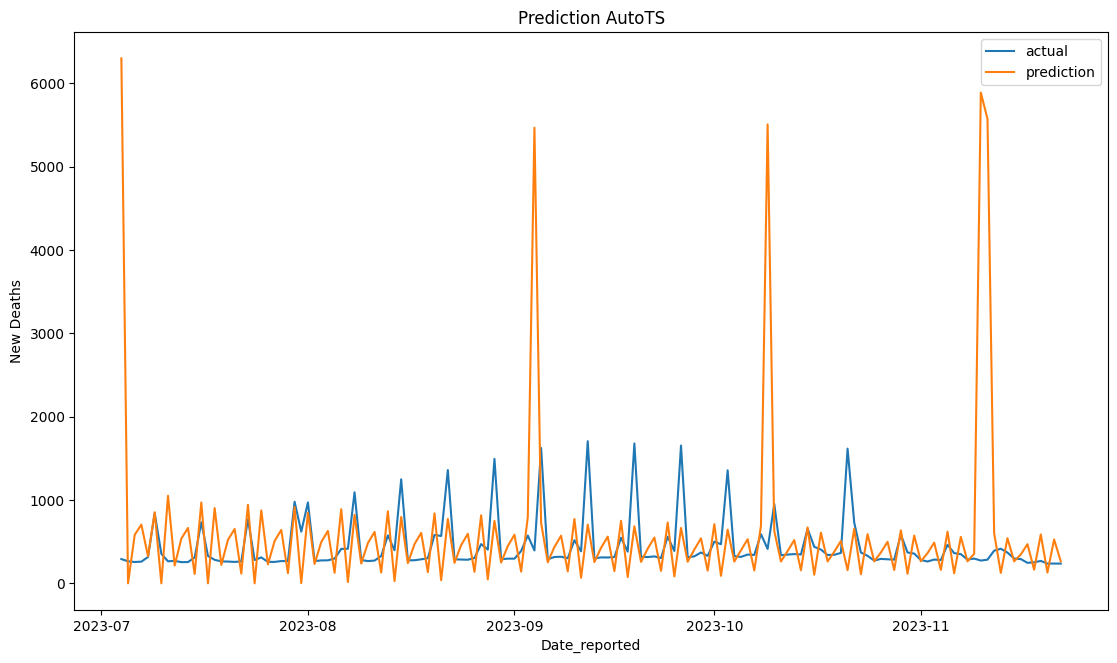

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(1280 / 96, 720 / 96))
ax.plot(dates[int(data_length*train_split):], test[target_column].values, label="actual")
ax.plot(dates[int(data_length*train_split):], prediction.forecast[target_column], label="prediction")
ax.set_title("Prediction AutoTS")
ax.set_ylabel("New Deaths")
ax.set_xlabel(date_column)
ax.legend()
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
plt.show()

Metrics

In [9]:
non_zero = []
import sys
 
for i in prediction.forecast[target_column]:
    if i == 0:
        non_zero.append(i+sys.float_info.min)
    else:
        non_zero.append(i)
print_evaluation_metrics(non_zero, test[target_column])

Evaluation Metrics:
MSE: 1144877.04
RMSE: 1069.99
MAE: 429.04
MAPE: 117.43
SMAPE: 65.51


In [6]:
store_model(model, "automl")